# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 3: Planetary Motions
## 03.03.2019

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from scipy import stats
import time
import imageio
import os, shutil
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from decimal import Decimal

In [14]:
sns.set_style(style='whitegrid')

### Planets

In [15]:
# [Mass in kg,
#  Distance from central celestail body in AU,
#  eccentricity,
#  Size in AU]
Planets={
    'Sun': [1.989e30, 0, 0.0001, 4.649e-03],
    'Moon': [7.348e22, 0.00257, 0.0549, 1.161e-05],
    'Mercury': [3.285e23, 0.466697, 0.205630, 1.631e-05],
    'Venus': [4.867e24, 0.728213, 0.006772, 4.045e-05],
    'Earth': [5.972e24, 1.017, 0.0167086, 4.259e-05],
    'Mars': [6.39e23, 1.666, 0.0934, 2.266e-05],
    'Jupiter': [1.898e27, 5.4588, 0.0489, 4.673e-04],
    'Saturn': [5.683e26, 10.1238, 0.0565, 3.893e-04],
    'Uranus': [8.681e25, 20.11, 0.046381, 1.695e-04],
    'Neptune': [1.024e26, 30.33, 0.009456, 1.646e-04],
    'Pluto': [1.309e22, 49.305, 0.2488, 7.954e-06],
    'Halley': [2.2e14, 35.082, 0.96714, 3.68e-08]
}

Planet_Colors={
    'Sun': np.array([216, 148, 29])/255,
    'Moon': np.array([204, 198, 195])/255,
    'Mercury': np.array([186, 186, 186])/255,
    'Venus': np.array([216, 194, 153])/255,
    'Earth': np.array([45, 52, 130])/255,
    'Mars': np.array([217, 120, 62])/255,
    'Jupiter': np.array([187, 155, 99])/255,
    'Saturn': np.array([222, 181, 82])/255,
    'Uranus': np.array([201, 239, 241])/255,
    'Neptune': np.array([72, 120, 242])/255,
    'Pluto': np.array([65, 25, 20])/255,
    'Halley': np.array([0,0,0])/255
}

## Initial conditions

In [38]:
choosen_planet_1 = 'Sun'
choosen_planet_2 = 'Mercury'

G = 1.9838e-29

# Second planet orbits the first one
# m: mass [kg]
# r_ap: Aphelion distance [AU]
# ecc: Eccentricity
if(choosen_planet_1 != ''):
    m_1 = Planets[choosen_planet_1][0]
else:
    m_1 = Planets['Sun'][0]

if(choosen_planet_2 != ''):
    m_2 = Planets[choosen_planet_2][0]
    r_ap = Planets[choosen_planet_2][1]
    ecc = Planets[choosen_planet_2][2]
else:
    m_2 = Planets['Jupiter'][0]
    r_ap = 0.2
    ecc = 0.5
    
# Step size
dt = 1e-05
# Adaptive accuracy of simulation
accuracy = 1e-12

# Calculated orbit parameters
# a: semi-major axis in [AU]
# b: semi-minor axis in [AU]
a = r_ap / (1 + ecc)
b = np.sqrt(1 - ecc**2) * a

# Initial velocity of first body (tangential along y-axis) [AU/day]
v0 = np.sqrt(G * (m_1 + m_2) * (2 / r_ap - 1 / a))

# Orbital period in [years]
T = np.power(a, 3/2)

# Number of years to plot
plotting_years = 100 * T

# Others
steps = 1
image_dpi = 150
image_format = 'pdf'
image_path = '..\\Documentation\\src\\images\\single_body\\'

In [18]:
print(v0)

8.195213703010507


In [19]:
def mode_choose(mode, odeint, relat):
    
    current_mode = ('..\Release\kepler.exe ' +
                    mode + ' ' +
                    odeint + ' ' +
                    relat + ' ' +
                    str(m_1) + ' ' +
                    str(m_2) + ' ' +
                    str(r_ap) + ' ' +
                    str(ecc) + ' ' +
                    str(plotting_years) + ' ' +
                    str(dt) + ' ' +
                    str(accuracy)
                   )

    return(current_mode)

In [20]:
current_mode = mode_choose(mode = 'fixed', odeint='rkck', relat='no')
os.system(current_mode)
data_fixed = np.genfromtxt('fixed.dat')

current_mode = mode_choose(mode = 'adaptive',  odeint='rkck', relat='no')
os.system(current_mode)
data_adaptive = np.genfromtxt('adaptive.dat')

## Time propagation of coordinates and velocities

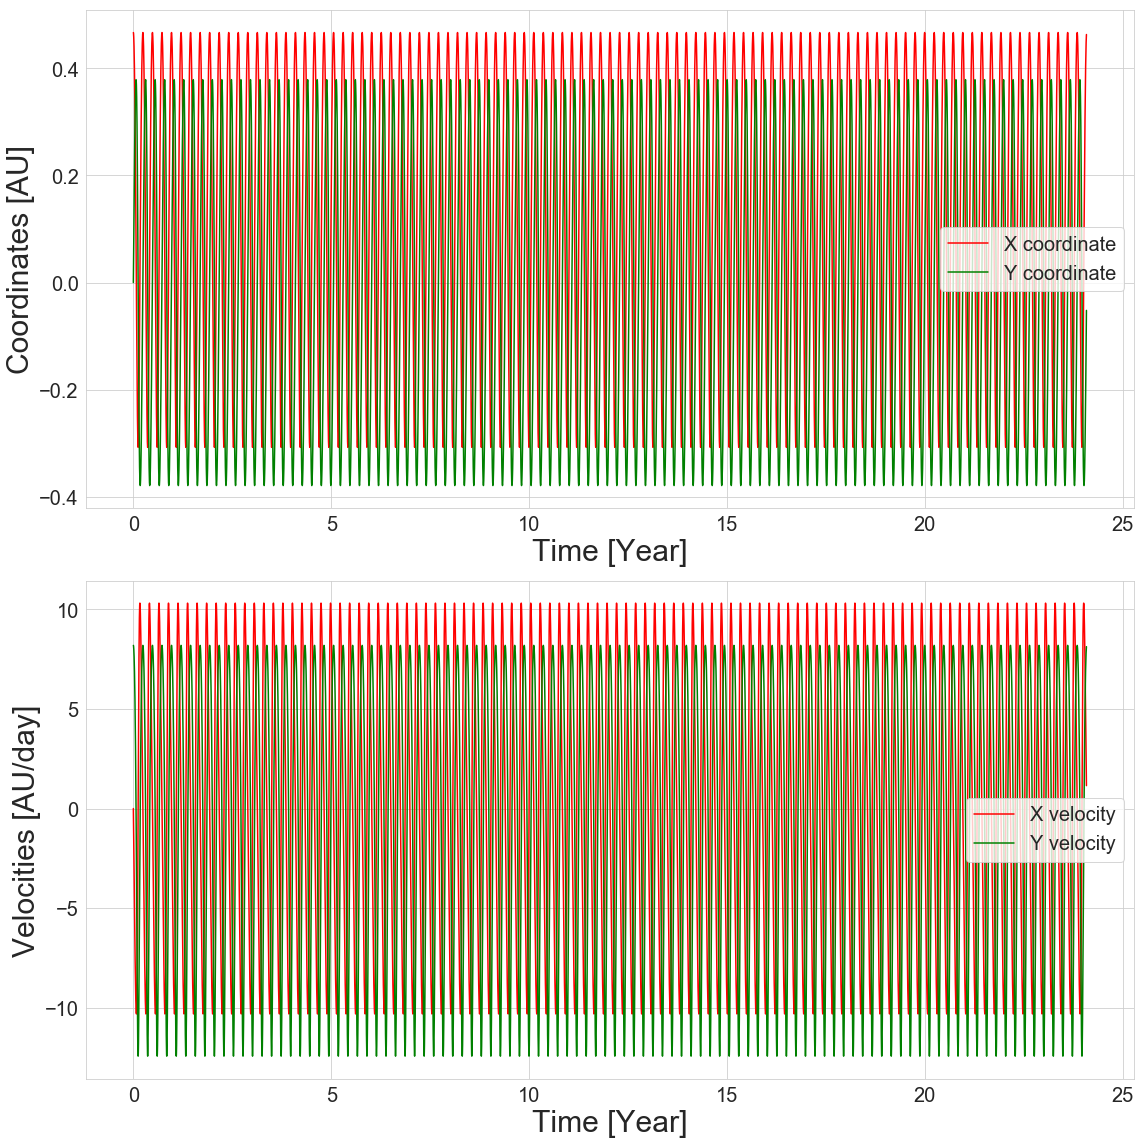

In [21]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*16,nrows*8))

axes[0].plot(data_fixed[0:,0], data_fixed[0:,1], c='red', label='X coordinate')
axes[0].plot(data_fixed[0:,0], data_fixed[0:,2], c='green', label='Y coordinate')
axes[1].plot(data_fixed[0:,0], data_fixed[0:,3], c='red', label='X velocity')
axes[1].plot(data_fixed[0:,0], data_fixed[0:,4], c='green', label='Y velocity')

axes[0].set_xlabel('Time [Year]', fontsize=30)
axes[0].set_ylabel('Coordinates [AU]', fontsize=30)
axes[1].set_xlabel('Time [Year]', fontsize=30)
axes[1].set_ylabel('Velocities [AU/day]', fontsize=30)

axes[0].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)

axes[0].legend(fontsize=20)
axes[1].legend(fontsize=20)

fig.tight_layout()
plt.show()

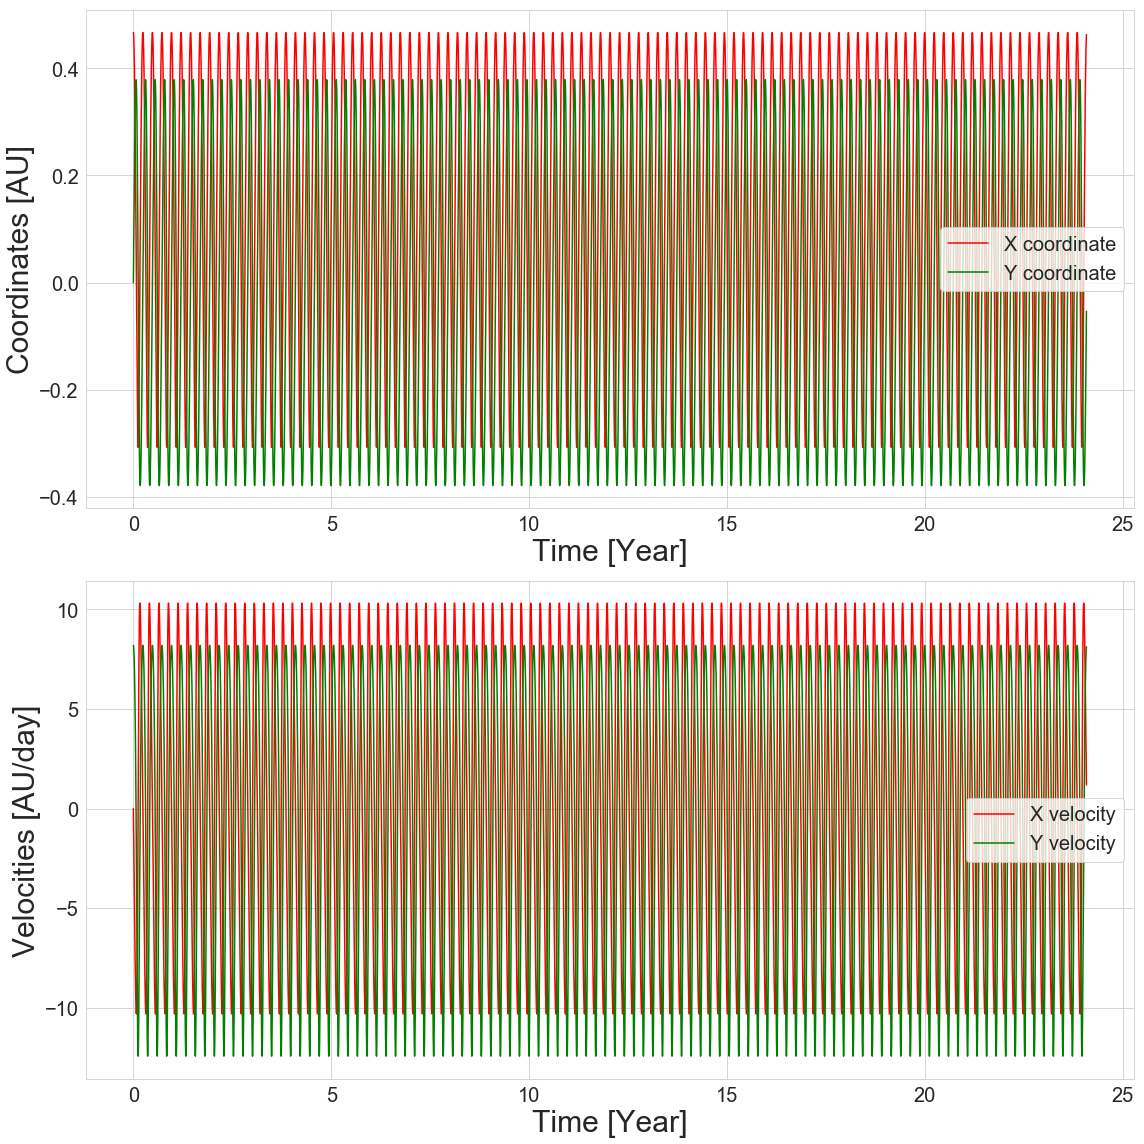

In [22]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*16,nrows*8))

axes[0].plot(data_adaptive[0:,0], data_adaptive[0:,1], c='red', label='X coordinate')
axes[0].plot(data_adaptive[0:,0], data_adaptive[0:,2], c='green', label='Y coordinate')
axes[1].plot(data_adaptive[0:,0], data_adaptive[0:,3], c='red', label='X velocity')
axes[1].plot(data_adaptive[0:,0], data_adaptive[0:,4], c='green', label='Y velocity')

axes[0].set_xlabel('Time [Year]', fontsize=30)
axes[0].set_ylabel('Coordinates [AU]', fontsize=30)
axes[1].set_xlabel('Time [Year]', fontsize=30)
axes[1].set_ylabel('Velocities [AU/day]', fontsize=30)

axes[0].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)

axes[0].legend(fontsize=20)
axes[1].legend(fontsize=20)

fig.tight_layout()
plt.show()

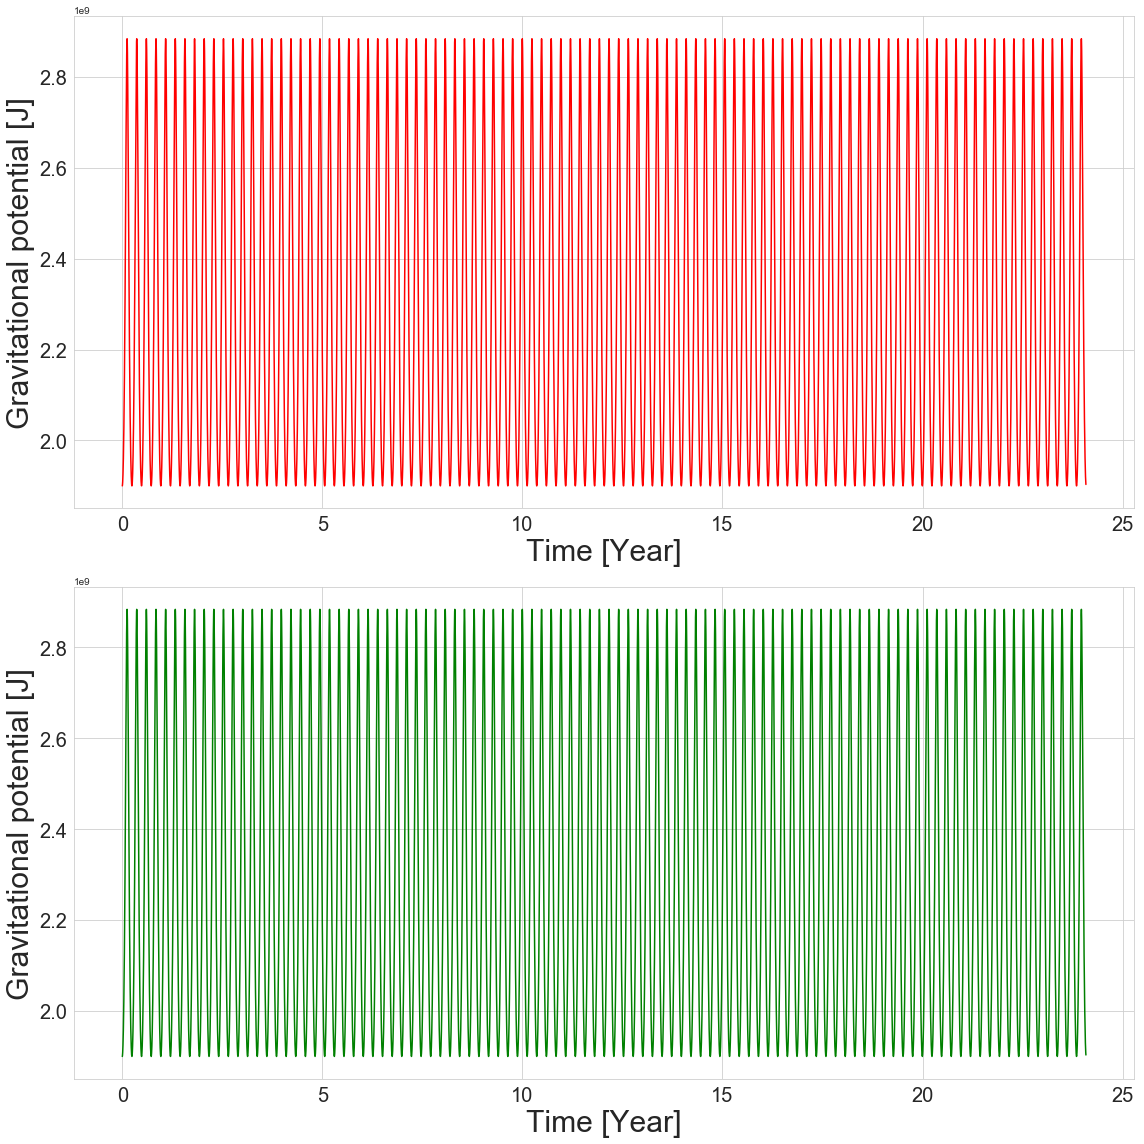

In [23]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*16,nrows*8))

axes[0].plot(data_fixed[0:,0], data_fixed[0:,5], c='red')
axes[1].plot(data_adaptive[0:,0], data_adaptive[0:,5], c='green')

axes[0].set_xlabel('Time [Year]', fontsize=30)
axes[0].set_ylabel('Gravitational potential [J]', fontsize=30)
axes[1].set_xlabel('Time [Year]', fontsize=30)
axes[1].set_ylabel('Gravitational potential [J]', fontsize=30)

axes[0].tick_params(axis='both', which='major', labelsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=20)

fig.tight_layout()
plt.show()

## Orbit of choosen Planet

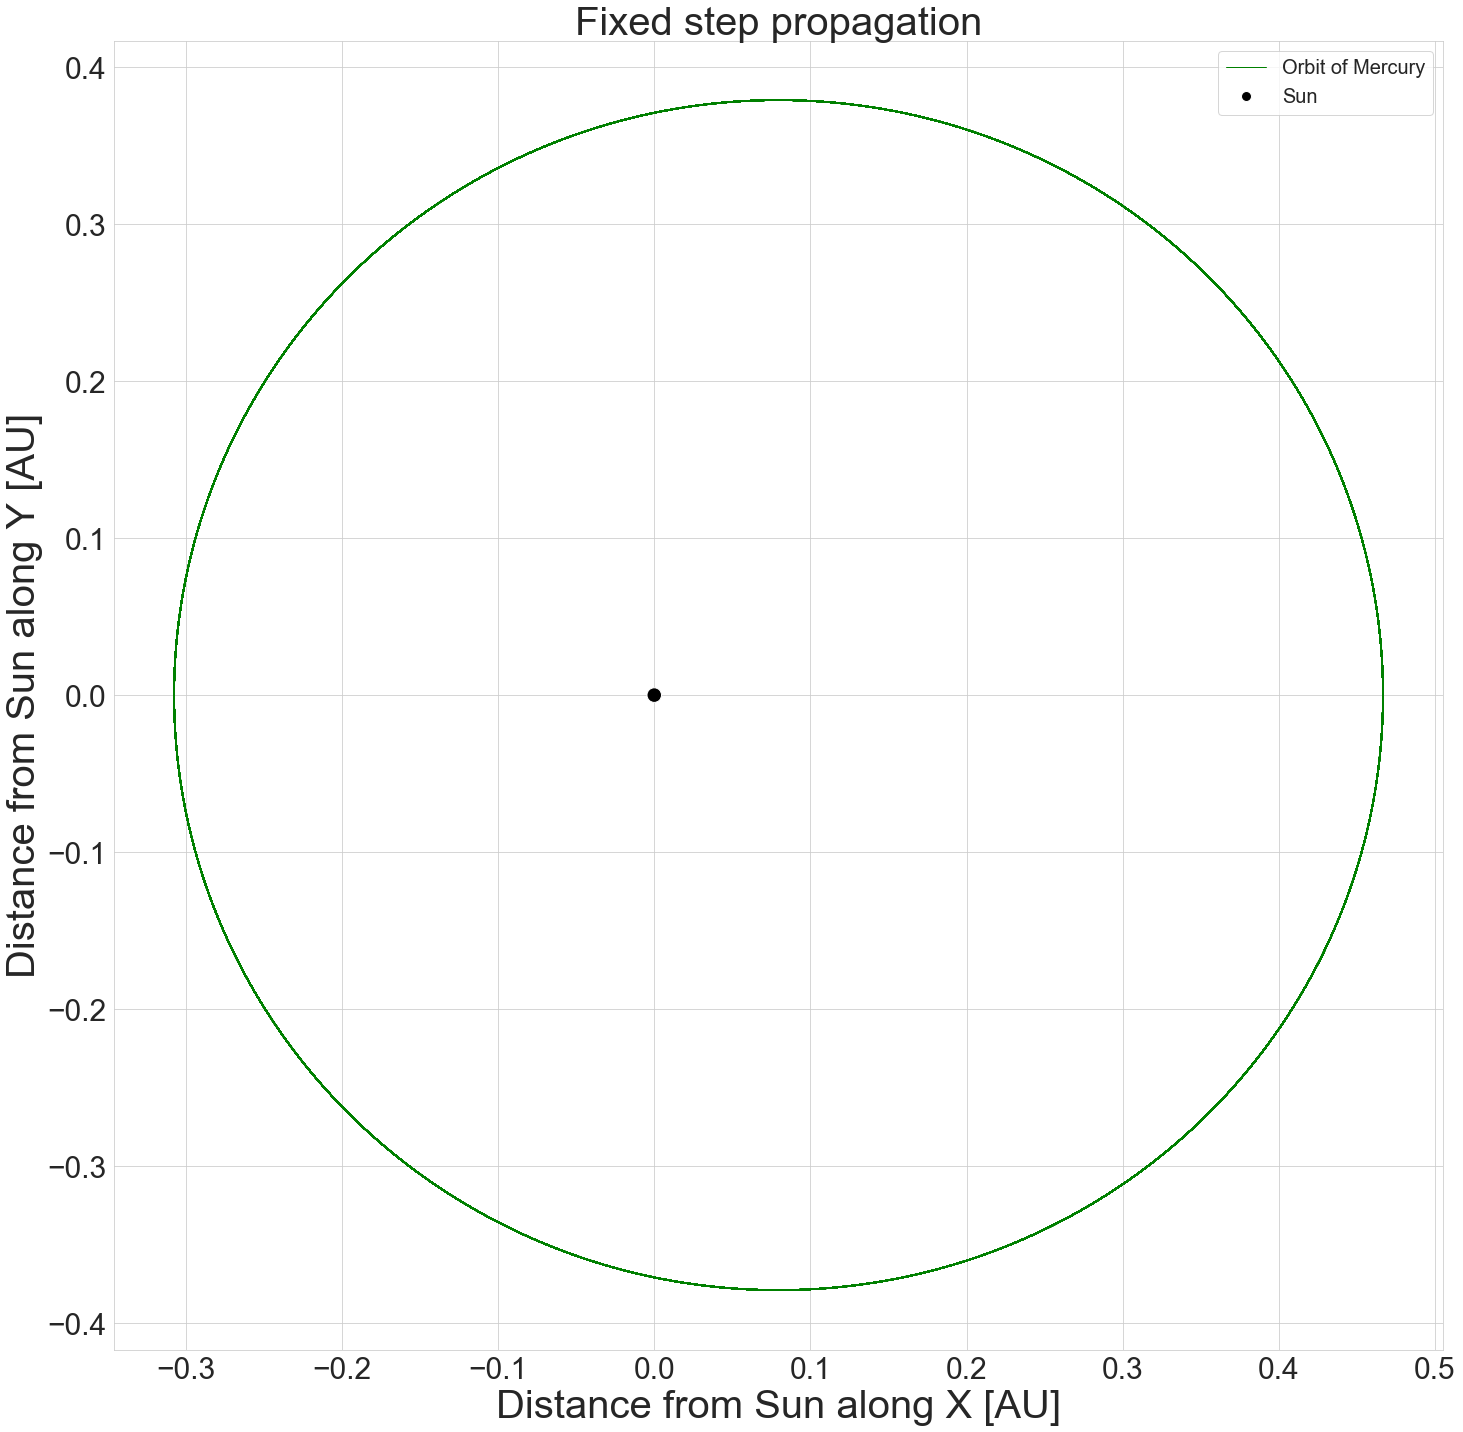

In [24]:
nrows = 1
ncols = 1
picsize = 20
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*(picsize)*(a/b),nrows*picsize))

axes.plot(data_fixed[::steps,1], data_fixed[::steps,2], c='green')

axes.set_title('Fixed step propagation', fontsize=40)

axes.set_xlabel('Distance from {0} along X [AU]'.format(choosen_planet_1), fontsize=40)
axes.set_ylabel('Distance from {0} along Y [AU]'.format(choosen_planet_1), fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

Central_body = Circle(xy=(0, 0), radius=Planets[choosen_planet_1][3], fc='black', zorder=10)
axes.add_patch(Central_body)

legend_elements = [Line2D([0], [0], color='green', lw=1, label='Orbit of {0}'.format(choosen_planet_2)),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor='black',
                          markersize=10, label=choosen_planet_1)]

axes.legend(handles=legend_elements, fontsize=20)
fig.tight_layout()
'''plt.savefig(image_path +
            'orbit_' + choosen_planet + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')'''
plt.show()

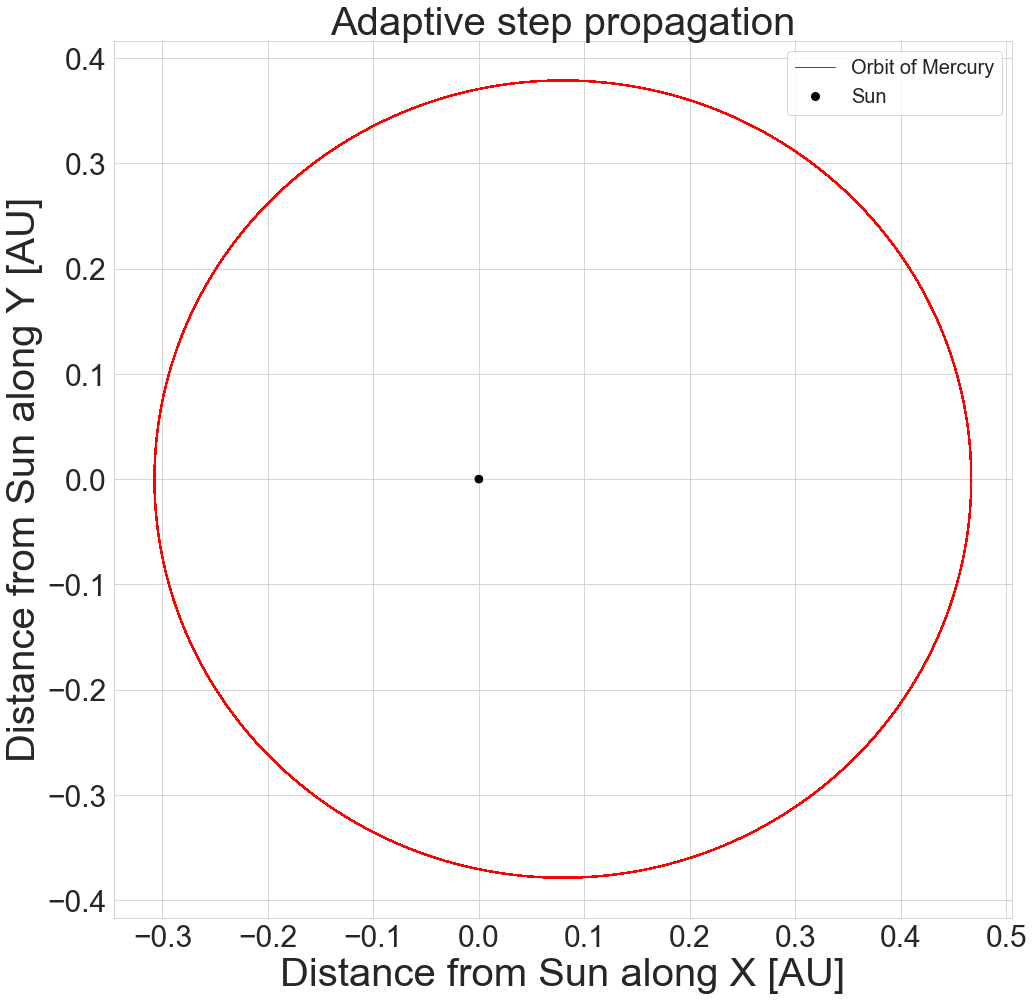

In [25]:
nrows = 1
ncols = 1
picsize = 14
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*(picsize)*(a/b),nrows*picsize))

axes.plot(data_adaptive[::steps,1], data_adaptive[::steps,2], c='red')

axes.set_title('Adaptive step propagation', fontsize=40)

axes.set_xlabel('Distance from Sun along X [AU]', fontsize=40)
axes.set_ylabel('Distance from Sun along Y [AU]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

Central_body = Circle(xy=(0, 0), radius=Planets[choosen_planet_1][3], fc='black', zorder=10)
axes.add_patch(Central_body)

legend_elements = [Line2D([0], [0], color='red', lw=1, label='Orbit of {0}'.format(choosen_planet_2)),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor='black',
                          markersize=10, label=choosen_planet_1)]

axes.legend(handles=legend_elements, fontsize=20)
fig.tight_layout()
'''plt.savefig(image_path +
            'orbit_' + choosen_planet + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')'''
plt.show()

## Planet orbit's precession due to numerical errors and relativity

In [26]:
def apogee_angles(dataset,
                  plotting_years,
                  T):

    apogee_angles = []
    step = int(len(dataset)/(plotting_years/T))

    
    for i in range(0,int(plotting_years/T)+1):
        apogee_angles.append(np.arctan(dataset[i * step,2]/dataset[i * step,1]))
        
    return apogee_angles

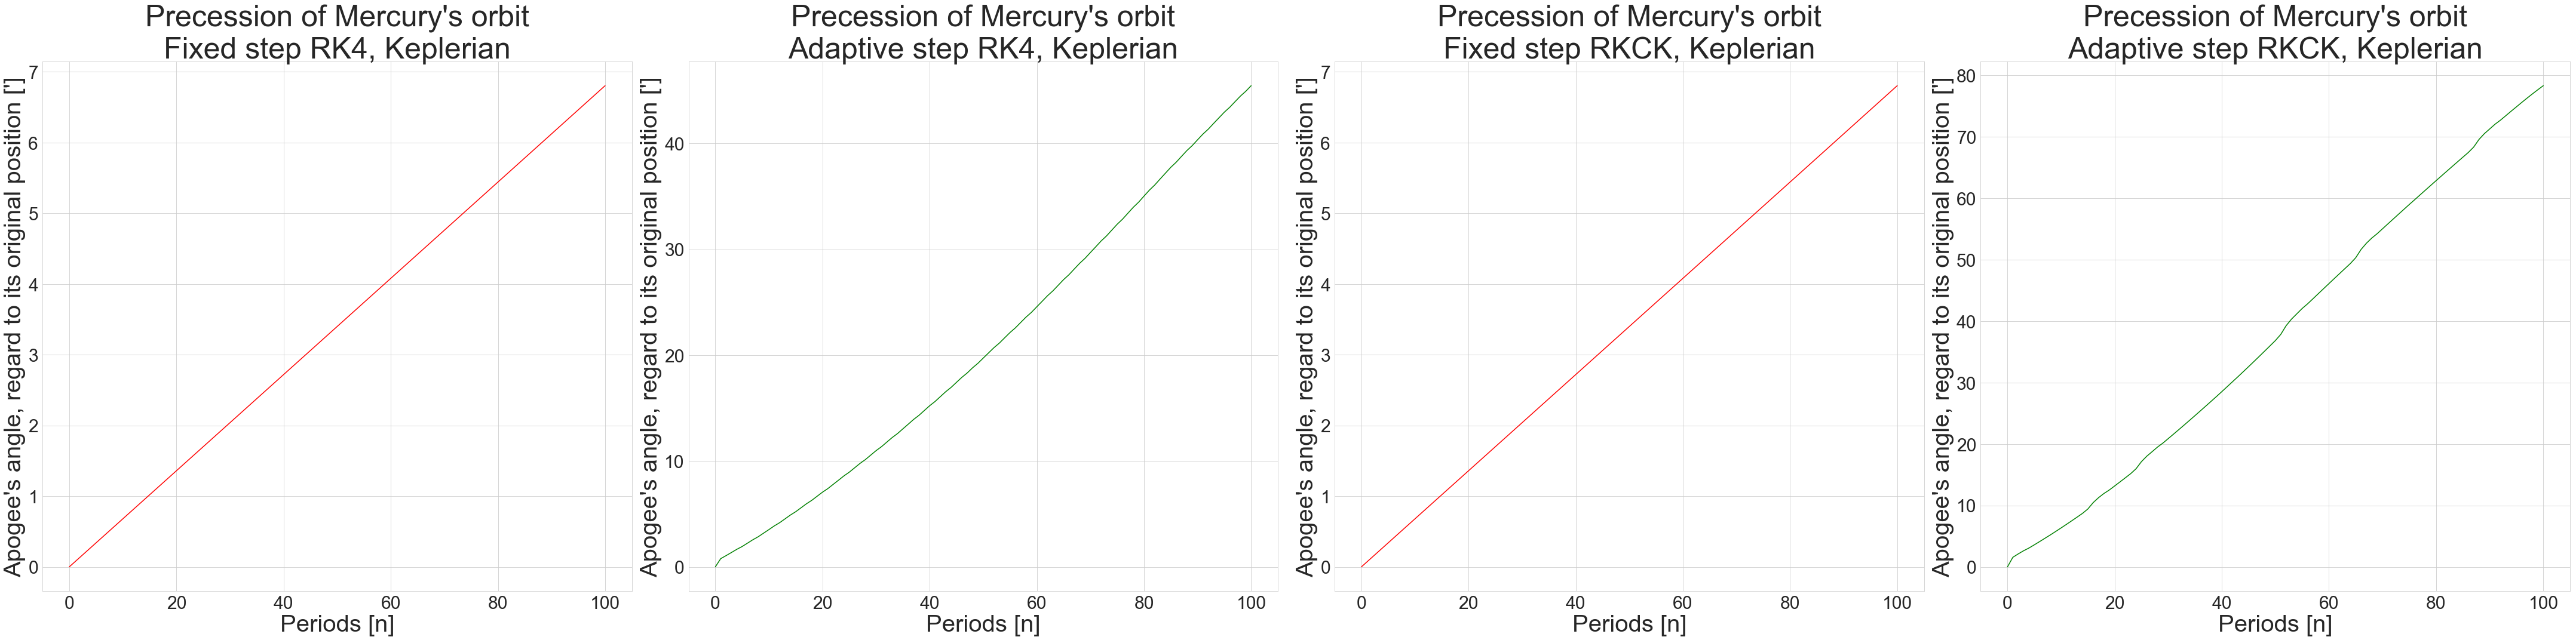

In [39]:
nrows = 1
ncols = 4
picsize = 30
titlesize=50
axislabelsize=40

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60,15))

# Simulation 1: Fixed Step RK4, Keplerian dynamics
current_mode = mode_choose(mode = 'fixed', odeint='runge', relat='no')
os.system(current_mode)
data_fixed = np.genfromtxt('fixed.dat')
axes[0].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_fixed, plotting_years=plotting_years, T=T))*60, c='red')
axes[0].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nFixed step RK4, Keplerian', fontsize=titlesize)


# Simulation 2: Adaptive Step RK4, Keplerian dynamics
current_mode = mode_choose(mode = 'adaptive',  odeint='runge', relat='no')
os.system(current_mode)
data_adaptive = np.genfromtxt('adaptive.dat')
axes[1].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_adaptive, plotting_years=plotting_years, T=T))*60, c='green')
axes[1].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nAdaptive step RK4, Keplerian', fontsize=titlesize)


# Simulation 3: Fixed Step RKCK, Keplerian dynamics
current_mode = mode_choose(mode = 'fixed', odeint='rkck', relat='no')
os.system(current_mode)
data_fixed = np.genfromtxt('fixed.dat')
axes[2].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_fixed, plotting_years=plotting_years, T=T))*60, c='red')
axes[2].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nFixed step RKCK, Keplerian', fontsize=titlesize)


# Simulation 4: Adaptive Step RKCK, Keplerian dynamics
current_mode = mode_choose(mode = 'adaptive',  odeint='rkck', relat='no')
os.system(current_mode)
data_adaptive = np.genfromtxt('adaptive.dat')
axes[3].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_adaptive, plotting_years=plotting_years, T=T))*60, c='green')
axes[3].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nAdaptive step RKCK, Keplerian', fontsize=titlesize)


for i in range(0,ncols):
    axes[i].set_xlabel('Periods [n]', fontsize=axislabelsize)
    axes[i].set_ylabel('Apogee\'s angle, regard to its original position [\']', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path +
            choosen_planet_2 + '_precession_kepler_' + 'dt_' + str(dt) + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

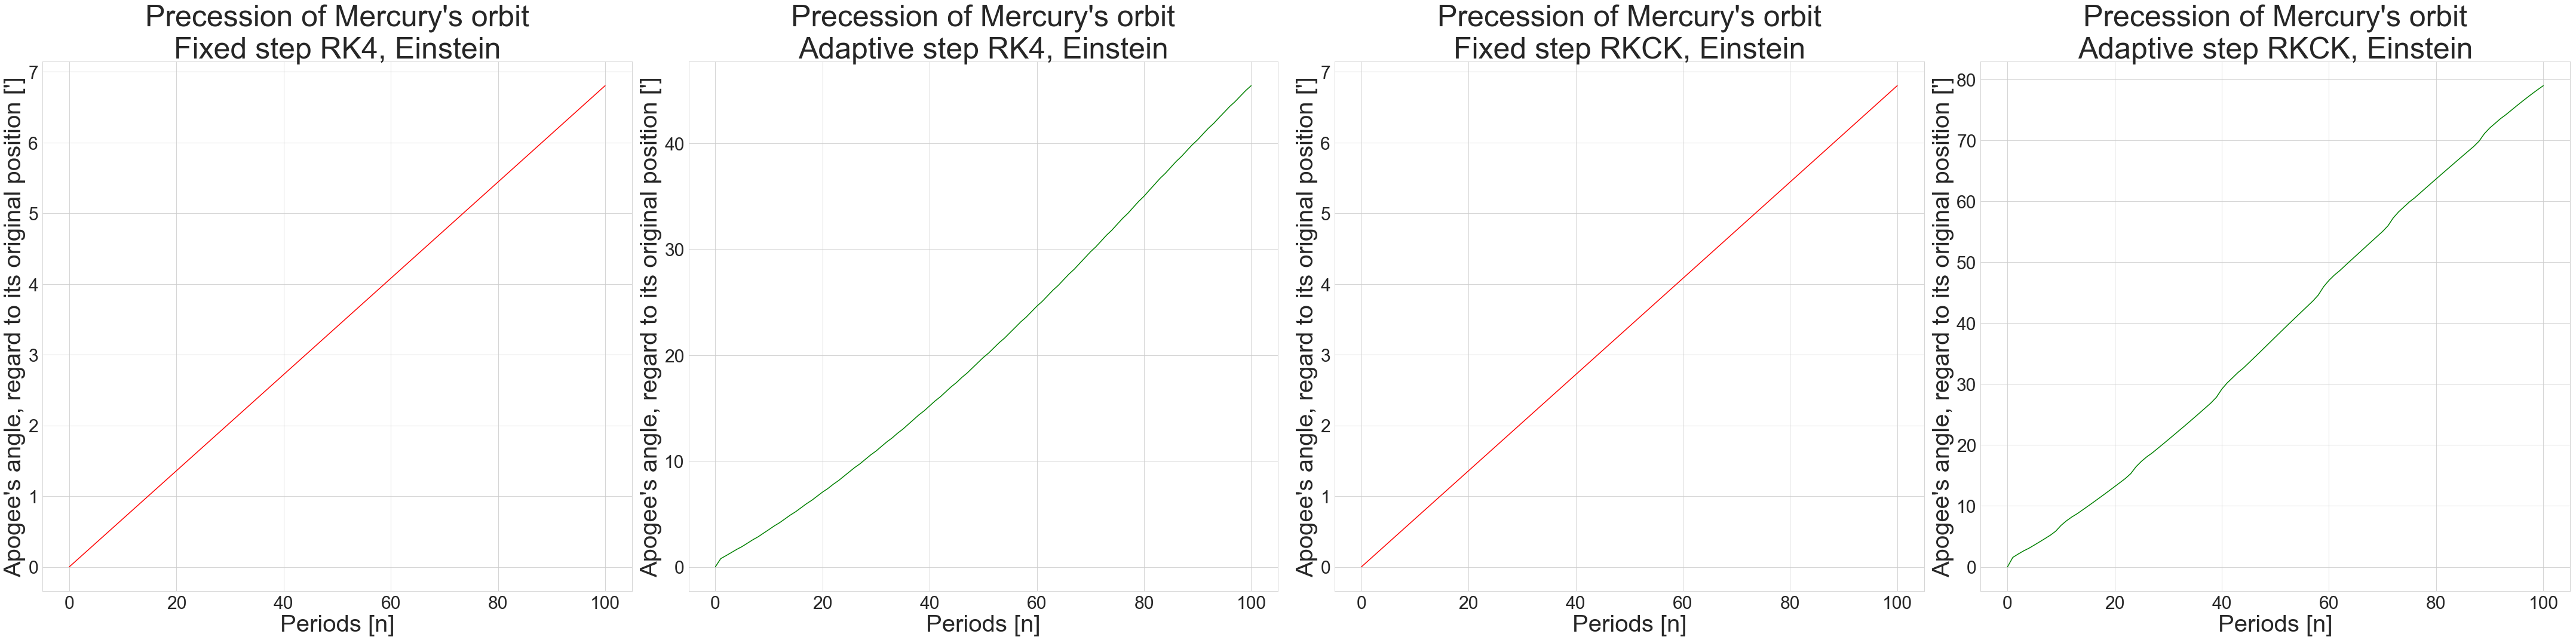

In [40]:
nrows = 1
ncols = 4
picsize = 30
titlesize=50
axislabelsize=40

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60,15))

# Simulation 1: Fixed Step RK4, Relativistic dynamics
current_mode = mode_choose(mode = 'fixed', odeint='runge', relat='relat')
os.system(current_mode)
data_fixed = np.genfromtxt('fixed.dat')
axes[0].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_fixed, plotting_years=plotting_years, T=T))*60, c='red')
axes[0].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nFixed step RK4, Einstein', fontsize=titlesize)


# Simulation 2: Adaptive Step RK4, Relativistic dynamics
current_mode = mode_choose(mode = 'adaptive',  odeint='runge', relat='relat')
os.system(current_mode)
data_adaptive = np.genfromtxt('adaptive.dat')
axes[1].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_adaptive, plotting_years=plotting_years, T=T))*60, c='green')
axes[1].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nAdaptive step RK4, Einstein', fontsize=titlesize)


# Simulation 3: Fixed Step RKCK, Relativistic dynamics
current_mode = mode_choose(mode = 'fixed', odeint='rkck', relat='relat')
os.system(current_mode)
data_fixed = np.genfromtxt('fixed.dat')
axes[2].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_fixed, plotting_years=plotting_years, T=T))*60, c='red')
axes[2].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nFixed step RKCK, Einstein', fontsize=titlesize)


# Simulation 4: Adaptive Step RKCK, Relativistic dynamics
current_mode = mode_choose(mode = 'adaptive',  odeint='rkck', relat='relat')
os.system(current_mode)
data_adaptive = np.genfromtxt('adaptive.dat')
axes[3].plot([i for i in range(0,int(plotting_years/T)+1)],
          np.abs(apogee_angles(dataset=data_adaptive, plotting_years=plotting_years, T=T))*60, c='green')
axes[3].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nAdaptive step RKCK, Einstein', fontsize=titlesize)


for i in range(0,ncols):
    axes[i].set_xlabel('Periods [n]', fontsize=axislabelsize)
    axes[i].set_ylabel('Apogee\'s angle, regard to its original position [\']', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path +
            choosen_planet_2 + '_precession_relat_' + 'dt_' + str(dt) + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

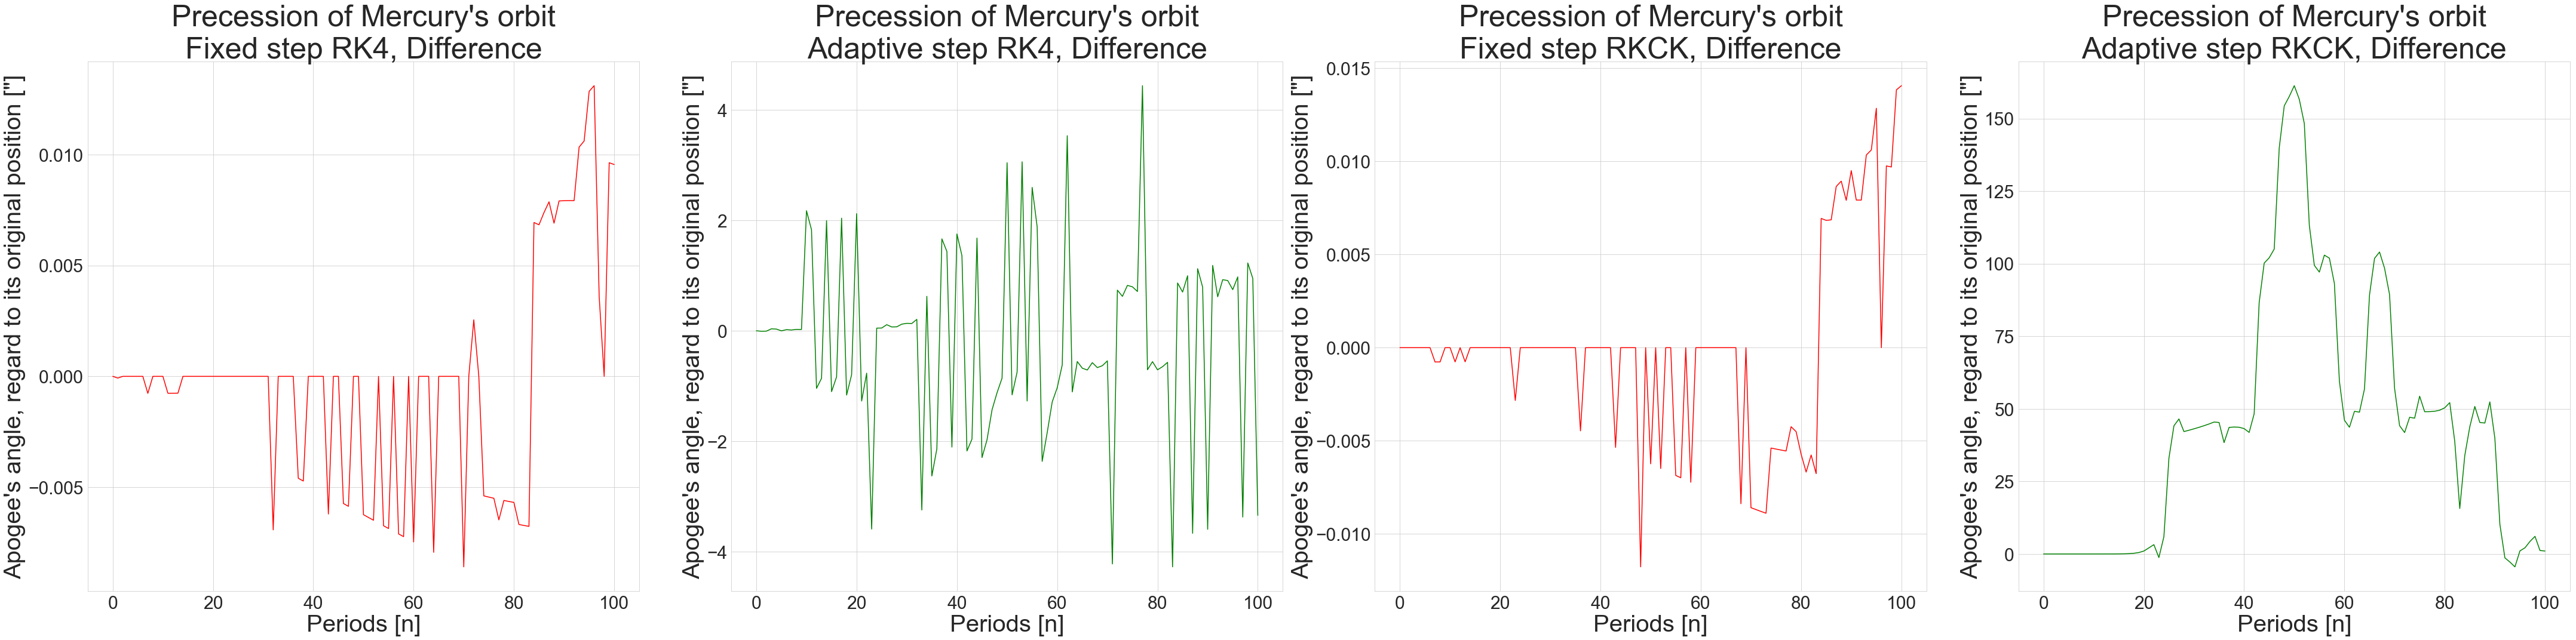

In [37]:
nrows = 1
ncols = 4
picsize = 30
titlesize=50
axislabelsize=40

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(60,15))

# Simulation 1: Fixed Step RK4, Difference of Relativistic and Keplerian dynamics
current_mode = mode_choose(mode = 'fixed', odeint='runge', relat='relat')
os.system(current_mode)
data_fixed_R = np.genfromtxt('fixed.dat')
current_mode = mode_choose(mode = 'fixed', odeint='runge', relat='no')
os.system(current_mode)
data_fixed_K = np.genfromtxt('fixed.dat')

axes[0].plot([i for i in range(0,int(plotting_years/T)+1)],
             (np.abs(apogee_angles(dataset=data_fixed_R, plotting_years=plotting_years, T=T)) - 
              np.abs(apogee_angles(dataset=data_fixed_K, plotting_years=plotting_years, T=T)))*3600, c='red')
axes[0].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nFixed step RK4, Difference', fontsize=titlesize)


# Simulation 2: Adaptive Step RK4, Difference of Relativistic and Keplerian dynamics
current_mode = mode_choose(mode = 'adaptive',  odeint='runge', relat='relat')
os.system(current_mode)
data_adaptive_R = np.genfromtxt('adaptive.dat')
current_mode = mode_choose(mode = 'adaptive',  odeint='runge', relat='no')
os.system(current_mode)
data_adaptive_K = np.genfromtxt('adaptive.dat')

axes[1].plot([i for i in range(0,int(plotting_years/T)+1)],
             (np.abs(apogee_angles(dataset=data_adaptive_R, plotting_years=plotting_years, T=T)) -
              np.abs(apogee_angles(dataset=data_adaptive_K, plotting_years=plotting_years, T=T)))*3600, c='green')
axes[1].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nAdaptive step RK4, Difference', fontsize=titlesize)


# Simulation 3: Fixed Step RKCK, Difference of Relativistic and Keplerian dynamics
current_mode = mode_choose(mode = 'fixed', odeint='rkck', relat='relat')
os.system(current_mode)
data_fixed_R = np.genfromtxt('fixed.dat')
current_mode = mode_choose(mode = 'fixed', odeint='rkck', relat='no')
os.system(current_mode)
data_fixed_K = np.genfromtxt('fixed.dat')

axes[2].plot([i for i in range(0,int(plotting_years/T)+1)],
             (np.abs(apogee_angles(dataset=data_fixed_R, plotting_years=plotting_years, T=T)) -
              np.abs(apogee_angles(dataset=data_fixed_K, plotting_years=plotting_years, T=T)))*3600, c='red')
axes[2].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nFixed step RKCK, Difference', fontsize=titlesize)


# Simulation 4: Adaptive Step RKCK, Difference of Relativistic and Keplerian dynamics
current_mode = mode_choose(mode = 'adaptive',  odeint='rkck', relat='relat')
os.system(current_mode)
data_adaptive_R = np.genfromtxt('adaptive.dat')
current_mode = mode_choose(mode = 'adaptive',  odeint='rkck', relat='no')
os.system(current_mode)
data_adaptive_K = np.genfromtxt('adaptive.dat')

axes[3].plot([i for i in range(0,int(plotting_years/T)+1)],
          (np.abs(apogee_angles(dataset=data_adaptive_R, plotting_years=plotting_years, T=T)) -
           np.abs(apogee_angles(dataset=data_adaptive_K, plotting_years=plotting_years, T=T)))*3600, c='green')
axes[3].set_title('Precession of ' + choosen_planet_2 + '\'s orbit\nAdaptive step RKCK, Difference', fontsize=titlesize)


for i in range(0,ncols):
    axes[i].set_xlabel('Periods [n]', fontsize=axislabelsize)
    axes[i].set_ylabel('Apogee\'s angle, regard to its original position [\"]', fontsize=axislabelsize)

    axes[i].tick_params(axis='both', which='major', labelsize=30)

fig.tight_layout()
plt.savefig(image_path +
            choosen_planet_2 + '_precession_difference_' + 'dt_' + str(dt) + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Accuracy dependency of adaptive stepsize methods

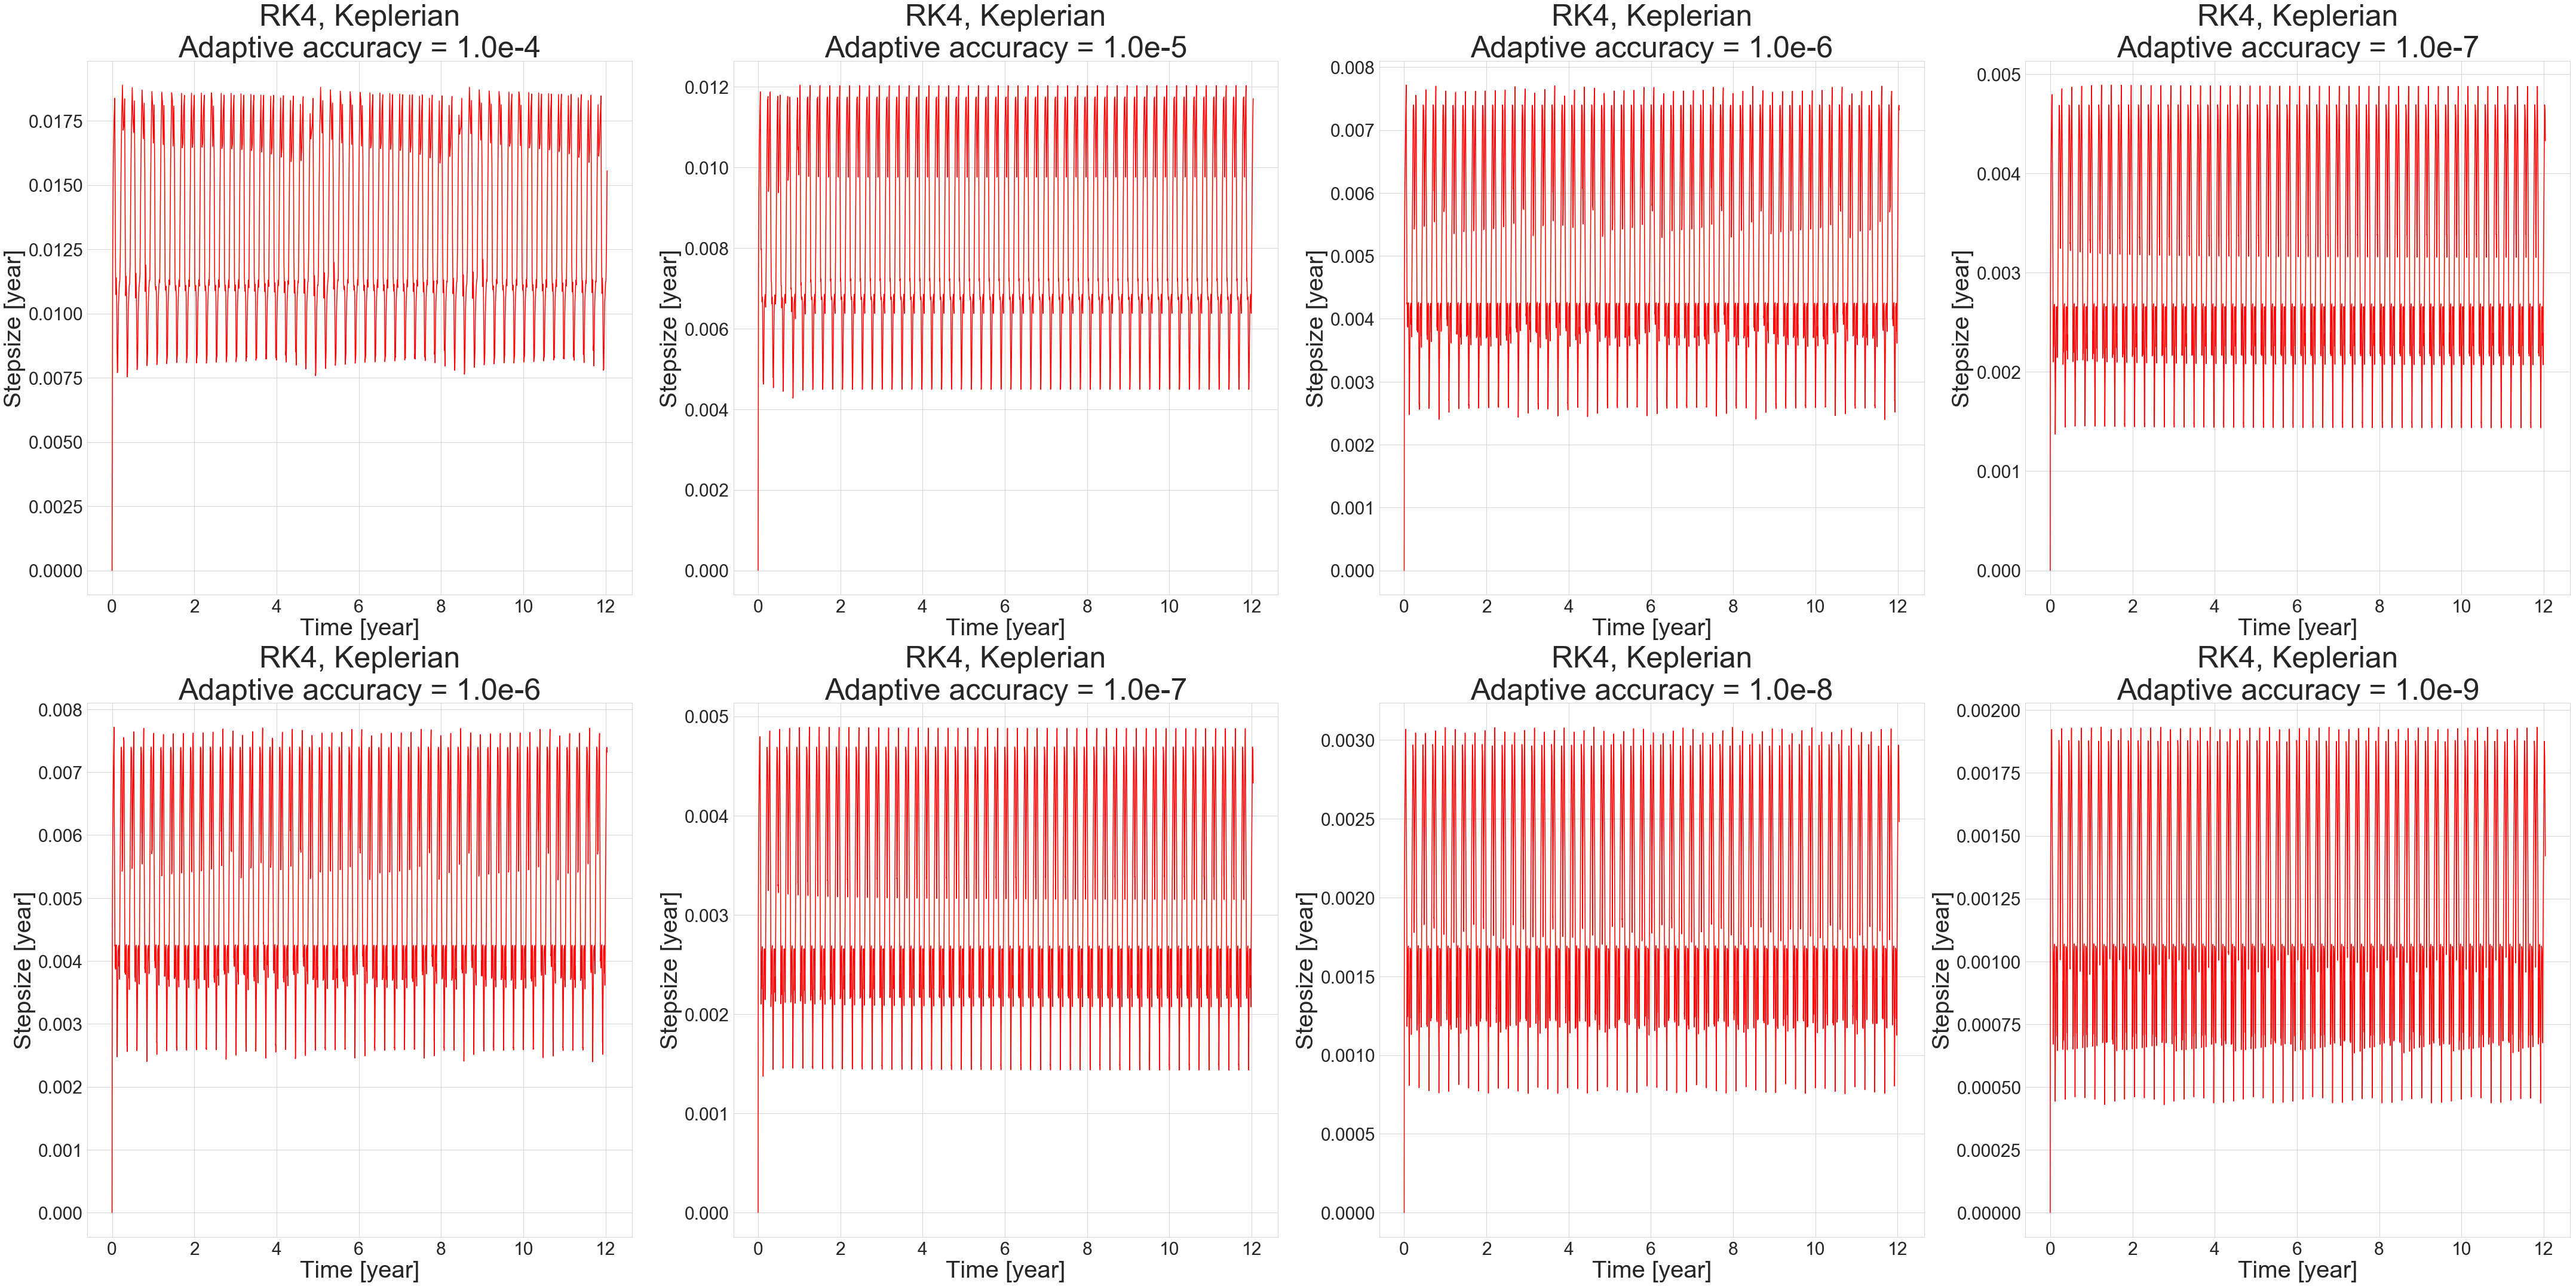

In [30]:
nrows = 2
ncols = 4
titlesize=50
axislabelsize=40

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*15,nrows*15))

# Simulation: Adaptive Step RK4, Keplerian dynamics
# Adaptive accuracy ranges from 1e-04 to 1e-11
for i in range(0,nrows):
    for j in range(0,ncols):
        accuracy = pow(10, -4 - (i * nrows + j))
        plotting_years = T * 50
        current_mode = mode_choose(mode = 'adaptive', odeint='runge', relat='no')
        os.system(current_mode)
        data_adaptive = np.genfromtxt('adaptive.dat')
        
        axes[i][j].plot(data_adaptive[::steps,0], data_adaptive[::steps,6], c='red')
        
        axes[i][j].set_title('RK4, Keplerian\nAdaptive accuracy = {0:.1e}'.format(Decimal(accuracy)),
                             fontsize=titlesize)

        axes[i][j].set_xlabel('Time [year]',
                              fontsize=axislabelsize)

        axes[i][j].set_ylabel('Stepsize [year]',
                              fontsize=axislabelsize)

        axes[i][j].tick_params(axis='both',
                               which='major',
                               labelsize=30)
        
        axes[i][j].yaxis.get_offset_text().set_fontsize(20)


fig.tight_layout()
plt.savefig(image_path +
            choosen_planet_2 + '_adaptive_accuracy_kepler_runge.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

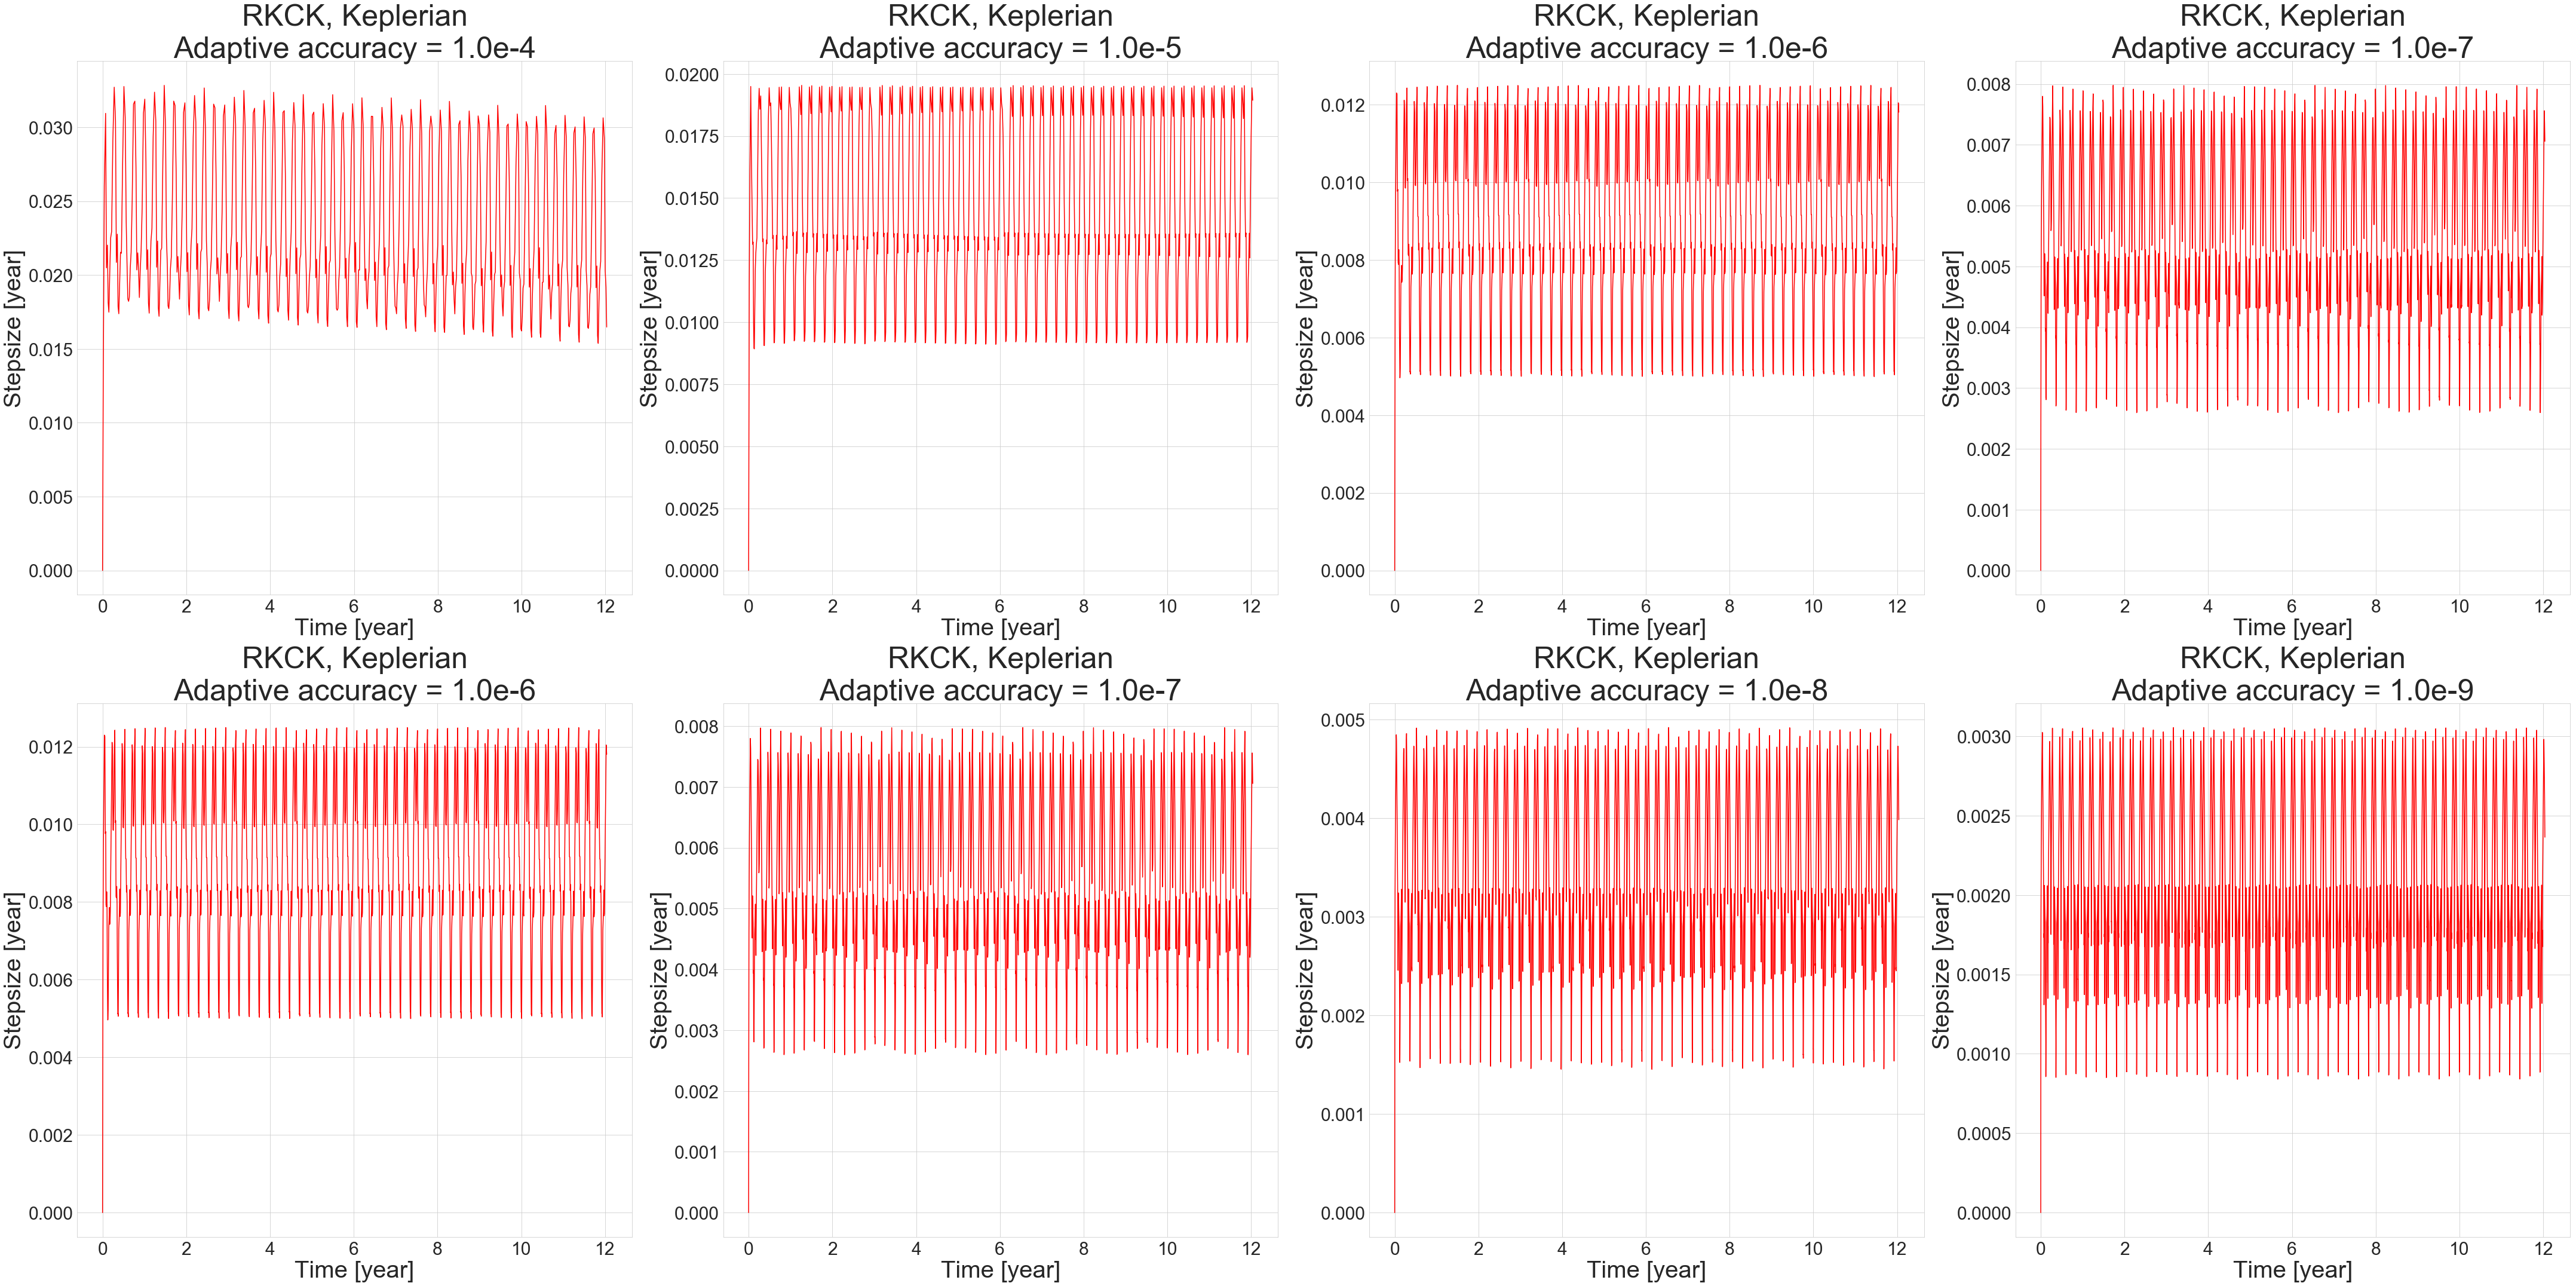

In [31]:
nrows = 2
ncols = 4
titlesize=50
axislabelsize=40

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*15,nrows*15))

# Simulation: Adaptive Step RKCK, Keplerian dynamics
# Adaptive accuracy ranges from 1e-04 to 1e-11
for i in range(0,nrows):
    for j in range(0,ncols):
        accuracy = pow(10, -4 - (i * nrows + j))
        plotting_years = T * 50
        current_mode = mode_choose(mode = 'adaptive', odeint='rkck', relat='no')
        os.system(current_mode)
        data_adaptive = np.genfromtxt('adaptive.dat')
        
        axes[i][j].plot(data_adaptive[::steps,0], data_adaptive[::steps,6], c='red')
        
        axes[i][j].set_title('RKCK, Keplerian\nAdaptive accuracy = {0:.1e}'.format(Decimal(accuracy)),
                             fontsize=titlesize)

        axes[i][j].set_xlabel('Time [year]',
                              fontsize=axislabelsize)

        axes[i][j].set_ylabel('Stepsize [year]',
                              fontsize=axislabelsize)

        axes[i][j].tick_params(axis='both',
                               which='major',
                               labelsize=30)
        
        axes[i][j].yaxis.get_offset_text().set_fontsize(20)

    
fig.tight_layout()
plt.savefig(image_path +
            choosen_planet_2 + '_adaptive_accuracy_kepler_rkck.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

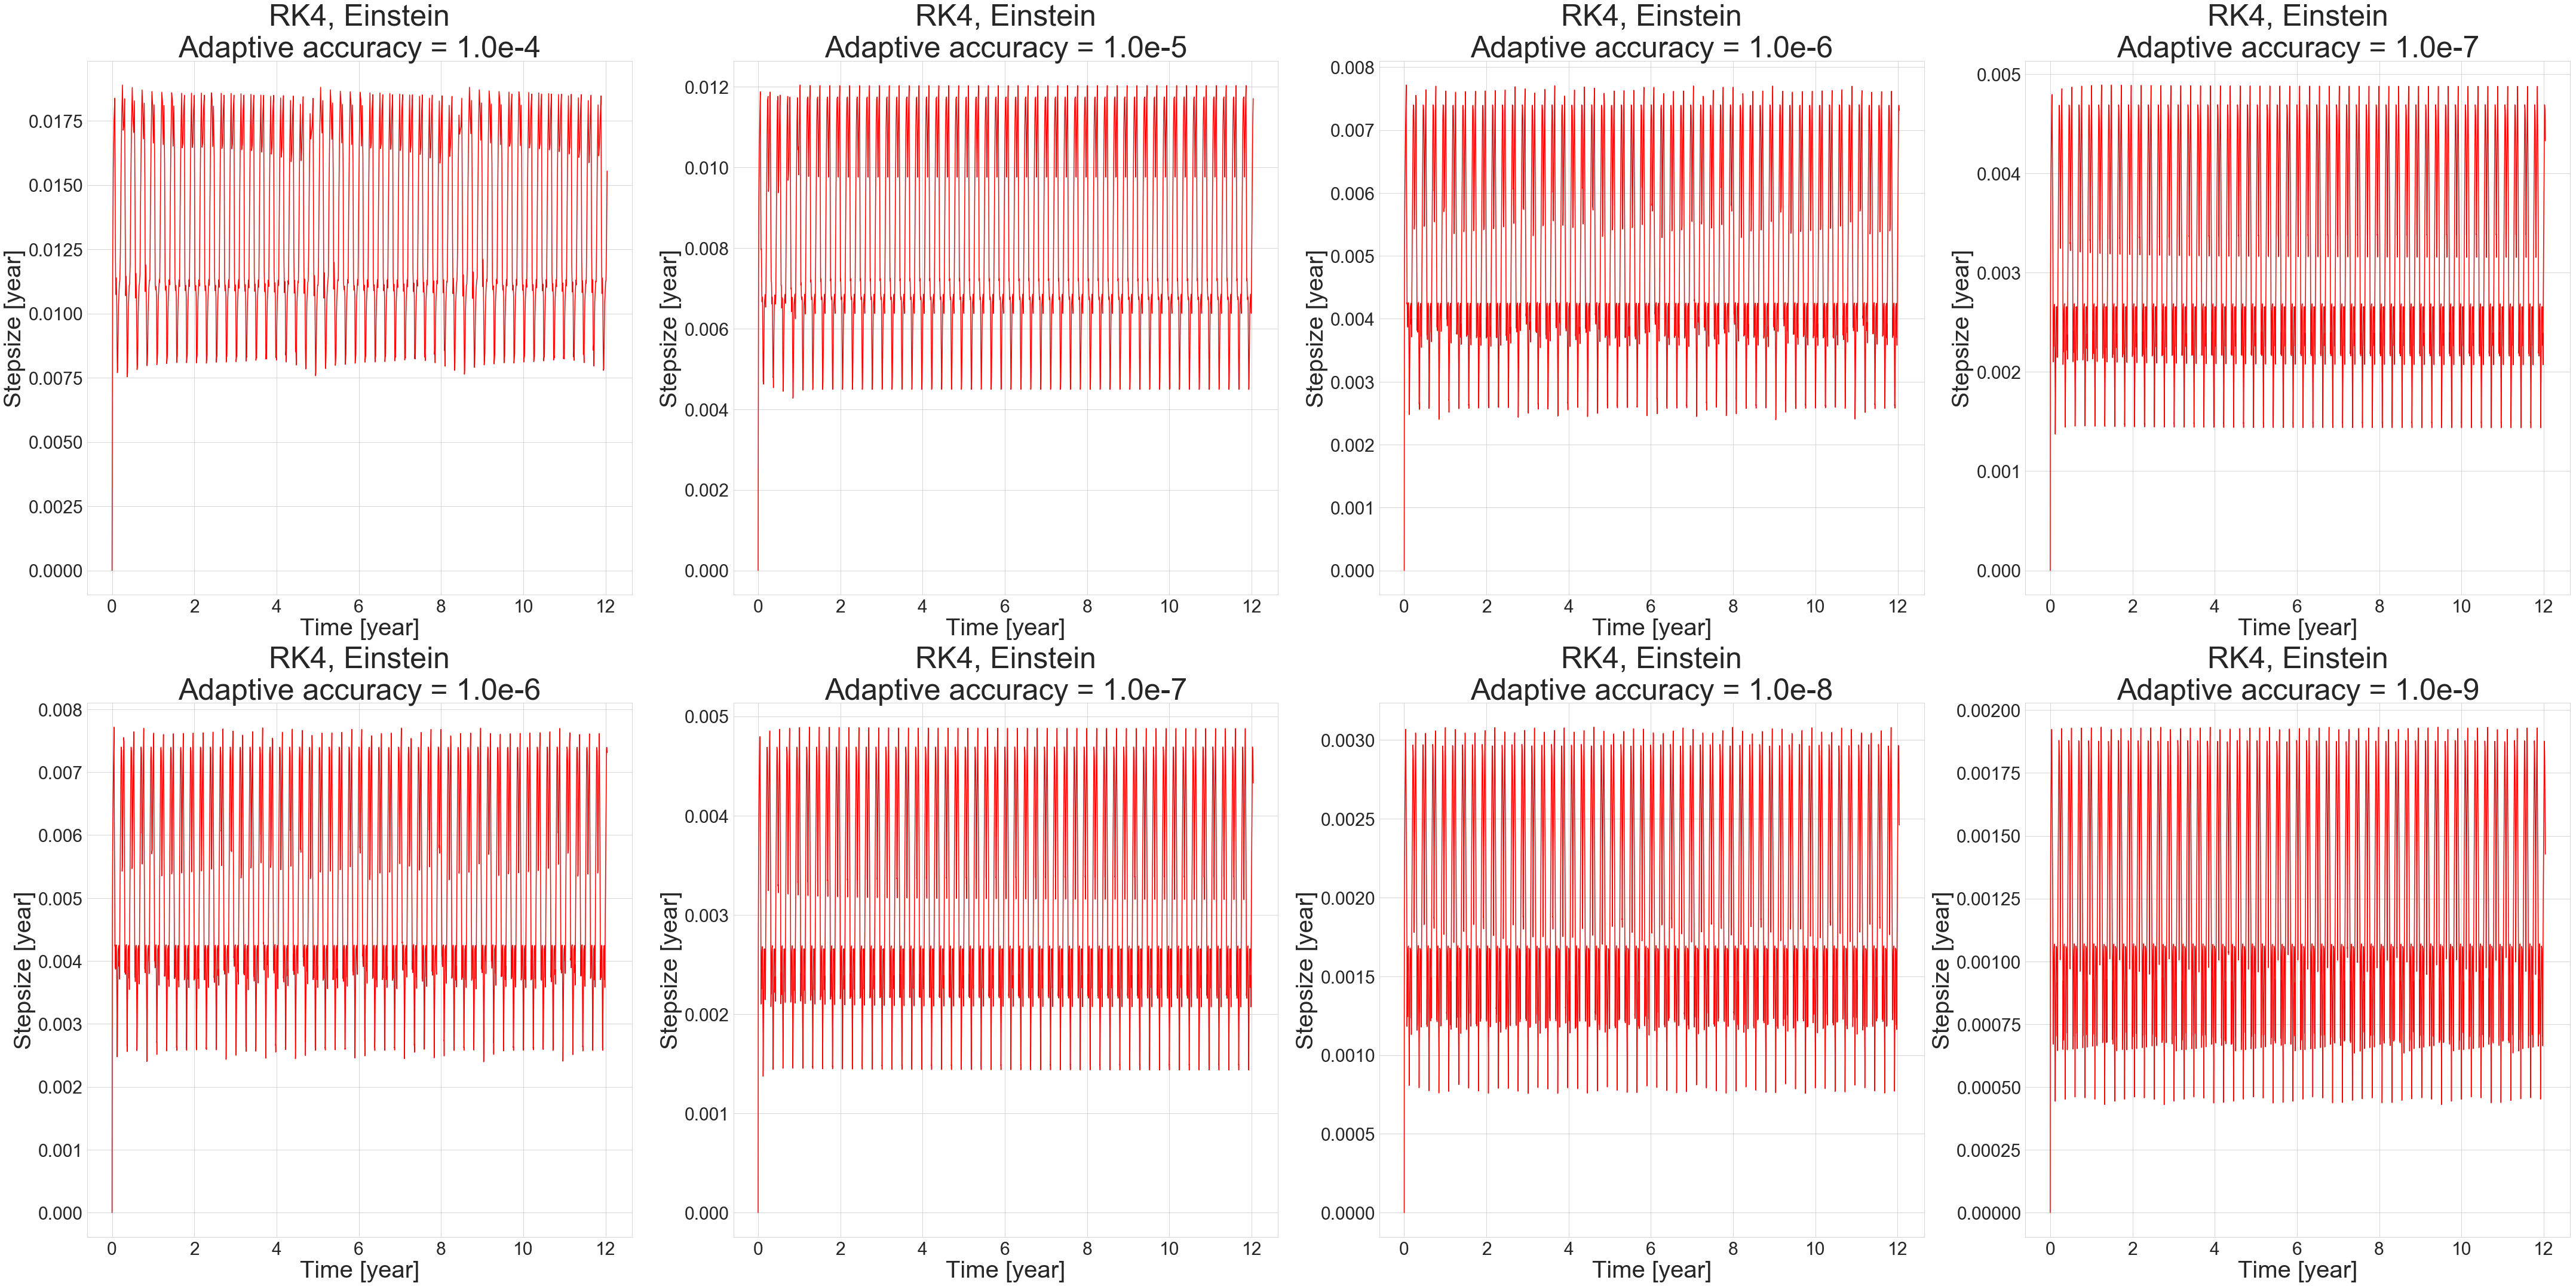

In [32]:
nrows = 2
ncols = 4
titlesize=50
axislabelsize=40

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*15,nrows*15))

# Simulation: Adaptive Step RK4, Relativistic dynamics
# Adaptive accuracy ranges from 1e-04 to 1e-11
for i in range(0,nrows):
    for j in range(0,ncols):
        accuracy = pow(10, -4 - (i * nrows + j))
        plotting_years = T * 50
        current_mode = mode_choose(mode = 'adaptive', odeint='runge', relat='relat')
        os.system(current_mode)
        data_adaptive = np.genfromtxt('adaptive.dat')
        
        axes[i][j].plot(data_adaptive[::steps,0], data_adaptive[::steps,6], c='red')
        
        axes[i][j].set_title('RK4, Einstein\nAdaptive accuracy = {0:.1e}'.format(Decimal(accuracy)),
                             fontsize=titlesize)

        axes[i][j].set_xlabel('Time [year]',
                              fontsize=axislabelsize)

        axes[i][j].set_ylabel('Stepsize [year]',
                              fontsize=axislabelsize)

        axes[i][j].tick_params(axis='both',
                               which='major',
                               labelsize=30)
        
        axes[i][j].yaxis.get_offset_text().set_fontsize(20)

    
fig.tight_layout()
plt.savefig(image_path +
            choosen_planet_2 + '_adaptive_accuracy_einstein_runge.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

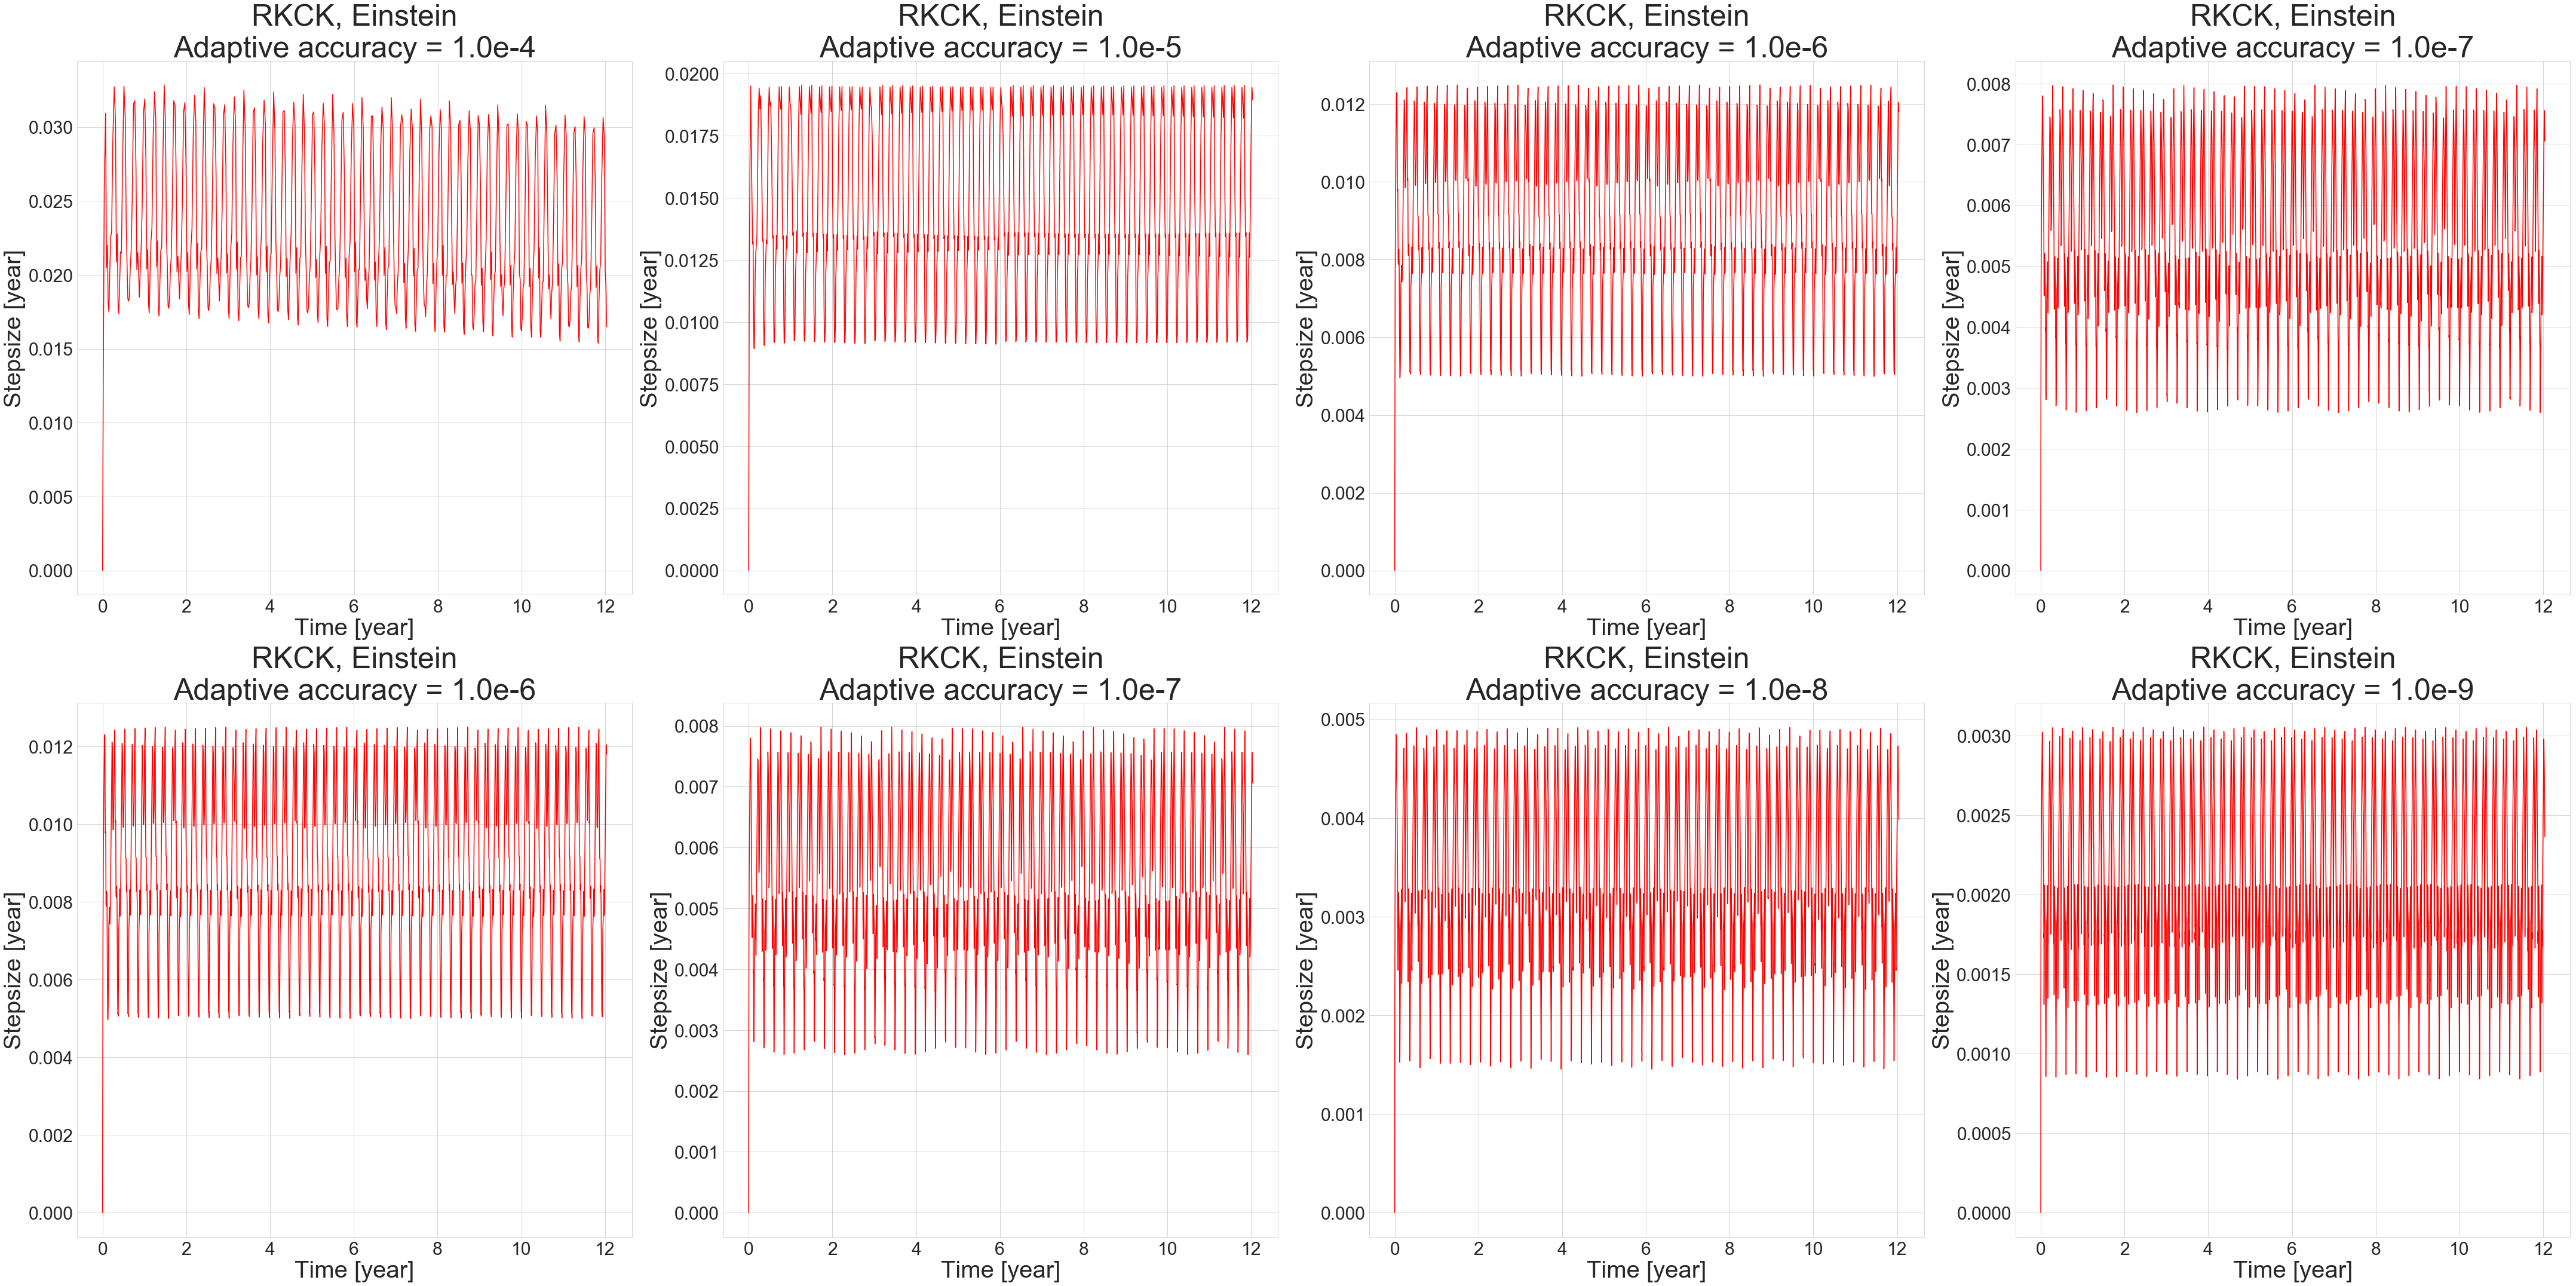

In [33]:
nrows = 2
ncols = 4
titlesize=50
axislabelsize=40

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*15,nrows*15))

# Simulation: Adaptive Step RK4, Relativistic dynamics
# Adaptive accuracy ranges from 1e-04 to 1e-11
for i in range(0,nrows):
    for j in range(0,ncols):
        accuracy = pow(10, -4 - (i * nrows + j))
        plotting_years = T * 50
        current_mode = mode_choose(mode = 'adaptive', odeint='rkck', relat='relat')
        os.system(current_mode)
        data_adaptive = np.genfromtxt('adaptive.dat')
        
        axes[i][j].plot(data_adaptive[::steps,0], data_adaptive[::steps,6], c='red')
        
        axes[i][j].set_title('RKCK, Einstein\nAdaptive accuracy = {0:.1e}'.format(Decimal(accuracy)),
                             fontsize=titlesize)

        axes[i][j].set_xlabel('Time [year]',
                              fontsize=axislabelsize)

        axes[i][j].set_ylabel('Stepsize [year]',
                              fontsize=axislabelsize)

        axes[i][j].tick_params(axis='both',
                               which='major',
                               labelsize=30)
        
        axes[i][j].yaxis.get_offset_text().set_fontsize(20)

    
fig.tight_layout()
plt.savefig(image_path +
            choosen_planet_2 + '_adaptive_accuracy_einstein_rkck.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Runtime of fixed and adaptive stepsized methods

In [41]:
dt = 1e-03
accuracy = 1e-03

plotting_years_min = 10
plotting_years_max = 80

run_time_runge_kepler_fixed = np.empty((plotting_years_max+1 - plotting_years_min))
run_time_runge_kepler_adaptive = np.empty((plotting_years_max+1 - plotting_years_min))
run_time_runge_relat_fixed = np.empty((plotting_years_max+1 - plotting_years_min))
run_time_runge_relat_adaptive = np.empty((plotting_years_max+1 - plotting_years_min))
run_time_rkck_kepler_fixed = np.empty((plotting_years_max+1 - plotting_years_min))
run_time_rkck_kepler_adaptive = np.empty((plotting_years_max+1 - plotting_years_min))
run_time_rkck_relat_fixed = np.empty((plotting_years_max+1 - plotting_years_min))
run_time_rkck_relat_adaptive = np.empty((plotting_years_max+1 - plotting_years_min))

index = 0
for time in range(plotting_years_min, plotting_years_max+1):
    
    plotting_years = time
    
    mode_runge_kepler_fixed = mode_choose(mode = 'fixed', odeint='runge', relat='no')
    mode_runge_kepler_adaptive = mode_choose(mode = 'adaptive', odeint='runge', relat='no')
    mode_runge_relat_fixed = mode_choose(mode = 'fixed', odeint='runge', relat='relat')
    mode_runge_relat_adaptive = mode_choose(mode = 'adaptive', odeint='runge', relat='relat')
    mode_rkck_kepler_fixed = mode_choose(mode = 'fixed', odeint='rkck', relat='no')
    mode_rkck_kepler_adaptive = mode_choose(mode = 'adaptive', odeint='rkck', relat='no')
    mode_rkck_relat_fixed = mode_choose(mode = 'fixed', odeint='rkck', relat='relat')
    mode_rkck_relat_adaptive = mode_choose(mode = 'adaptive', odeint='rkck', relat='relat')

    os.system(mode_runge_kepler_fixed)
    data_runge_kepler_fixed = np.genfromtxt('fixed.dat')
    
    os.system(mode_runge_kepler_adaptive)
    data_runge_kepler_adaptive = np.genfromtxt('adaptive.dat')
    
    os.system(mode_runge_relat_fixed)
    data_runge_relat_fixed = np.genfromtxt('fixed.dat')

    os.system(mode_runge_relat_adaptive)
    data_runge_relat_adaptive = np.genfromtxt('adaptive.dat')

    os.system(mode_rkck_kepler_fixed)
    data_rkck_kepler_fixed = np.genfromtxt('fixed.dat')

    os.system(mode_rkck_kepler_adaptive)
    data_rkck_kepler_adaptive = np.genfromtxt('adaptive.dat')
    
    os.system(mode_rkck_relat_fixed)
    data_rkck_relat_fixed = np.genfromtxt('fixed.dat')

    os.system(mode_rkck_relat_adaptive)
    data_rkck_relat_adaptive = np.genfromtxt('adaptive.dat')
    
    run_time_runge_kepler_fixed[index] = data_runge_kepler_fixed[-1,6]
    run_time_runge_kepler_adaptive[index] = data_runge_kepler_adaptive[-1,7]
    run_time_runge_relat_fixed[index] = data_runge_relat_fixed[-1,6]
    run_time_runge_relat_adaptive[index] = data_runge_relat_adaptive[-1,7]
    run_time_rkck_kepler_fixed[index] = data_rkck_kepler_fixed[-1,6]
    run_time_rkck_kepler_adaptive[index] = data_rkck_kepler_adaptive[-1,7]
    run_time_rkck_relat_fixed[index] = data_rkck_relat_fixed[-1,6]
    run_time_rkck_relat_adaptive[index] = data_rkck_relat_adaptive[-1,7]

    sys.stdout.write("\rCurrent run: {0} years".format(time))
    sys.stdout.flush()
    
    index += 1

Current run: 80 years

In [42]:
run_time_data = np.array([x for x in range(plotting_years_min, plotting_years_max+1)])

(slope_runge_kepler_fixed,
 intercept_runge_kepler_fixed,
 r_value_runge_kepler_fixed,
 p_value_runge_kepler_fixed,
 std_err_runge_kepler_fixed) = stats.linregress(run_time_data, run_time_runge_kepler_fixed)

(slope_runge_kepler_adaptive,
 intercept_runge_kepler_adaptive,
 r_value_runge_kepler_adaptive,
 p_value_runge_kepler_adaptive,
 std_err_runge_kepler_adaptive) = stats.linregress(run_time_data, run_time_runge_kepler_adaptive)

(slope_runge_relat_fixed,
 intercept_runge_relat_fixed,
 r_value_runge_relat_fixed,
 p_value_runge_relat_fixed,
 std_err_runge_relat_fixed) = stats.linregress(run_time_data, run_time_runge_relat_fixed)

(slope_runge_relat_adaptive,
 intercept_runge_relat_adaptive,
 r_value_runge_relat_adaptive,
 p_value_runge_relat_adaptive,
 std_err_runge_relat_adaptive) = stats.linregress(run_time_data, run_time_runge_relat_adaptive)

(slope_rkck_kepler_fixed,
 intercept_rkck_kepler_fixed,
 r_value_rkck_kepler_fixed,
 p_value_rkck_kepler_fixed,
 std_err_rkck_kepler_fixed) = stats.linregress(run_time_data, run_time_rkck_kepler_fixed)

(slope_rkck_kepler_adaptive,
 intercept_rkck_kepler_adaptive,
 r_value_rkck_kepler_adaptive,
 p_value_rkck_kepler_adaptive,
 std_err_rkck_kepler_adaptive) = stats.linregress(run_time_data, run_time_rkck_kepler_adaptive)

(slope_rkck_relat_fixed,
 intercept_rkck_relat_fixed,
 r_value_rkck_relat_fixed,
 p_value_rkck_relat_fixed,
 std_err_rkck_relat_fixed) = stats.linregress(run_time_data, run_time_rkck_relat_fixed)

(slope_rkck_relat_adaptive,
 intercept_rkck_relat_adaptive,
 r_value_rkck_relat_adaptive,
 p_value_rkck_relat_adaptive,
 std_err_rkck_relat_adaptive) = stats.linregress(run_time_data, run_time_rkck_relat_adaptive)


line_runge_kepler_fixed = slope_runge_kepler_fixed * run_time_data + intercept_runge_kepler_fixed
line_runge_kepler_adaptive = slope_runge_kepler_adaptive * run_time_data + intercept_runge_kepler_adaptive
line_runge_relat_fixed = slope_runge_relat_fixed * run_time_data + intercept_runge_relat_fixed
line_runge_relat_adaptive = slope_runge_relat_adaptive * run_time_data + intercept_runge_relat_adaptive
line_rkck_kepler_fixed = slope_rkck_kepler_fixed * run_time_data + intercept_rkck_kepler_fixed
line_rkck_kepler_adaptive = slope_rkck_kepler_adaptive * run_time_data + intercept_rkck_kepler_adaptive
line_rkck_relat_fixed = slope_rkck_relat_fixed * run_time_data + intercept_rkck_relat_fixed
line_rkck_relat_adaptive = slope_rkck_relat_adaptive * run_time_data + intercept_rkck_relat_adaptive

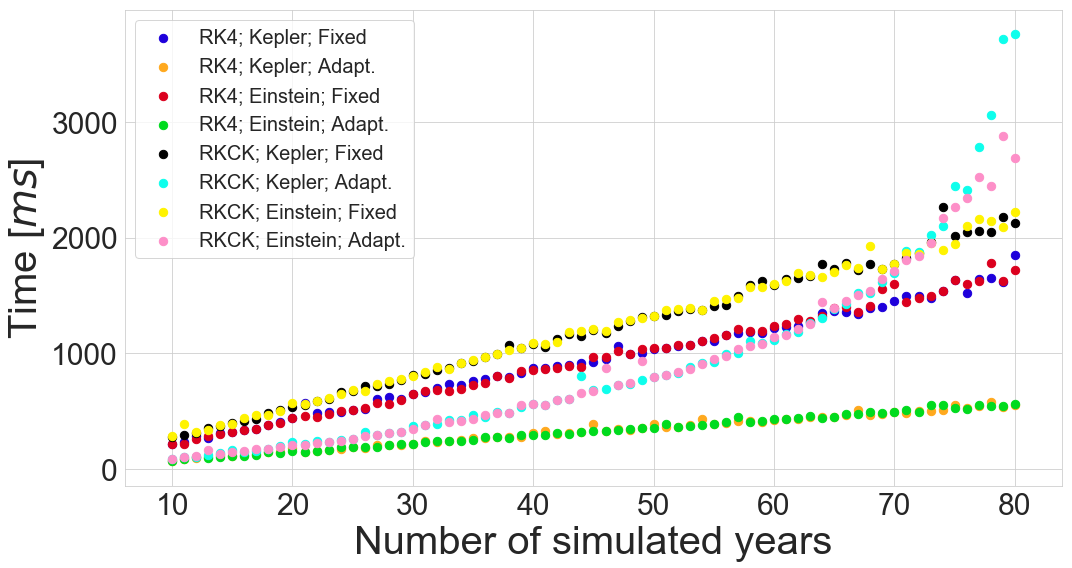

In [43]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15*ncols, 8*nrows))

norm_factor = 1000

red = np.array([219,0,30])/255
green = np.array([0,219,30])/255
blue = np.array([30,0,219])/255
orange = np.array([255,169,30])/255
pink = np.array([253,143,200])/255
yellow = np.array([255,243,0])/255
black = np.array([0,0,0])/255
tangerine = np.array([14,254,236])/255

point_size = 70
line_width = 2

axes.scatter(run_time_data, run_time_runge_kepler_fixed/norm_factor, color=blue, label='RK4; Kepler; Fixed', s=point_size)
axes.scatter(run_time_data, run_time_runge_kepler_adaptive/norm_factor, color=orange, label='RK4; Kepler; Adapt.', s=point_size)
axes.scatter(run_time_data, run_time_runge_relat_fixed/norm_factor, color=red, label='RK4; Einstein; Fixed', s=point_size)
axes.scatter(run_time_data, run_time_runge_relat_adaptive/norm_factor, color=green, label='RK4; Einstein; Adapt.', s=point_size)
axes.scatter(run_time_data, run_time_rkck_kepler_fixed/norm_factor, color=black, label='RKCK; Kepler; Fixed', s=point_size)
axes.scatter(run_time_data, run_time_rkck_kepler_adaptive/norm_factor, color=tangerine, label='RKCK; Kepler; Adapt.', s=point_size)
axes.scatter(run_time_data, run_time_rkck_relat_fixed/norm_factor, color=yellow, label='RKCK; Einstein; Fixed', s=point_size)
axes.scatter(run_time_data, run_time_rkck_relat_adaptive/norm_factor, color=pink, label='RKCK; Einstein; Adapt.', s=point_size)

axes.set_xlabel('Number of simulated years', fontsize=40)
axes.set_ylabel('Time [$m s$]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig(image_path + 'runtime_all_dt' + str(dt) + '.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

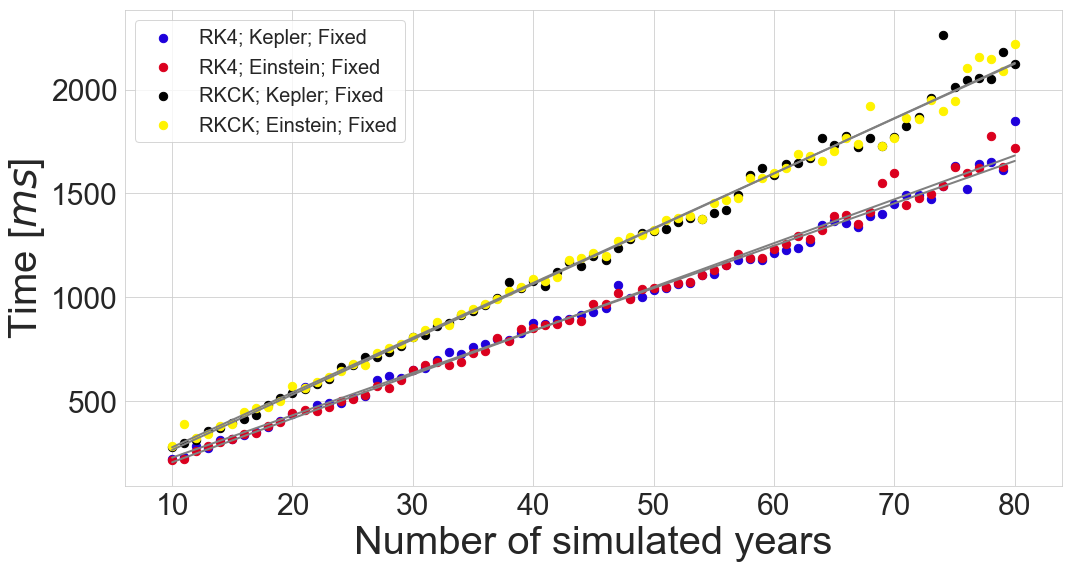

In [44]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15*ncols, 8*nrows))

norm_factor = 1000

red = np.array([219,0,30])/255
green = np.array([0,219,30])/255
blue = np.array([30,0,219])/255
orange = np.array([255,169,30])/255
pink = np.array([253,143,200])/255
yellow = np.array([255,243,0])/255
black = np.array([0,0,0])/255
tangerine = np.array([14,254,236])/255

point_size = 70
line_width = 2

axes.scatter(run_time_data, run_time_runge_kepler_fixed/norm_factor, color=blue, label='RK4; Kepler; Fixed', s=point_size)
axes.scatter(run_time_data, run_time_runge_relat_fixed/norm_factor, color=red, label='RK4; Einstein; Fixed', s=point_size)
axes.scatter(run_time_data, run_time_rkck_kepler_fixed/norm_factor, color=black, label='RKCK; Kepler; Fixed', s=point_size)
axes.scatter(run_time_data, run_time_rkck_relat_fixed/norm_factor, color=yellow, label='RKCK; Einstein; Fixed', s=point_size)

axes.plot(run_time_data, line_runge_kepler_fixed/norm_factor, color='grey', linewidth=line_width)
axes.plot(run_time_data, line_runge_relat_fixed/norm_factor, color='grey', linewidth=line_width)
axes.plot(run_time_data, line_rkck_kepler_fixed/norm_factor, color='grey', linewidth=line_width)
axes.plot(run_time_data, line_rkck_relat_fixed/norm_factor, color='grey', linewidth=line_width)

axes.set_xlabel('Number of simulated years', fontsize=40)
axes.set_ylabel('Time [$m s$]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig(image_path + 'runtime_fixed_dt' + str(dt) + '.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

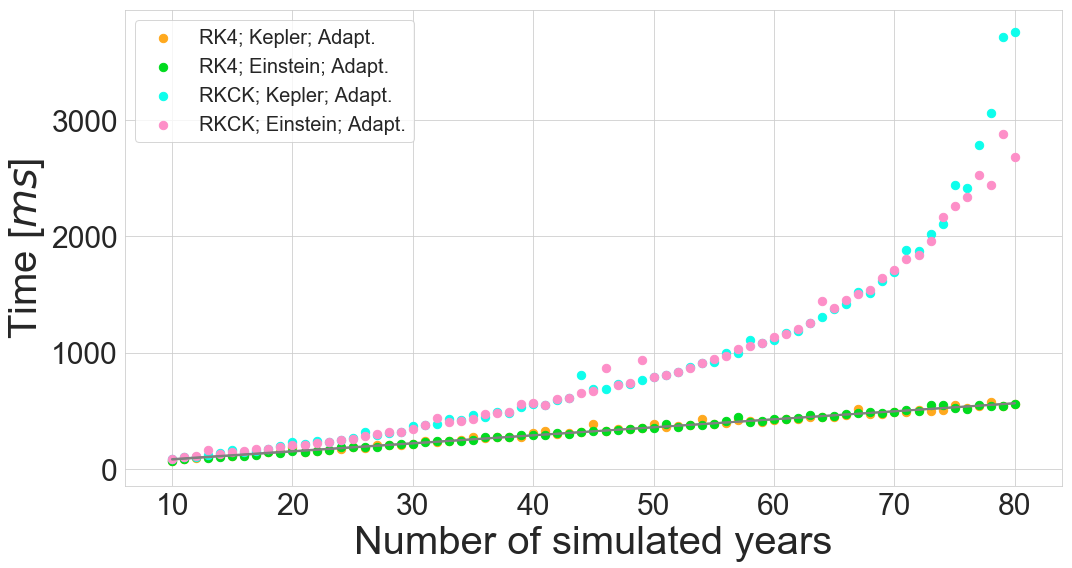

In [46]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15*ncols, 8*nrows))

norm_factor = 1000

red = np.array([219,0,30])/255
green = np.array([0,219,30])/255
blue = np.array([30,0,219])/255
orange = np.array([255,169,30])/255
pink = np.array([253,143,200])/255
yellow = np.array([255,243,0])/255
black = np.array([0,0,0])/255
tangerine = np.array([14,254,236])/255

point_size = 70
line_width = 2

axes.scatter(run_time_data, run_time_runge_kepler_adaptive/norm_factor, color=orange, label='RK4; Kepler; Adapt.', s=point_size)
axes.scatter(run_time_data, run_time_runge_relat_adaptive/norm_factor, color=green, label='RK4; Einstein; Adapt.', s=point_size)
axes.scatter(run_time_data, run_time_rkck_kepler_adaptive/norm_factor, color=tangerine, label='RKCK; Kepler; Adapt.', s=point_size)
axes.scatter(run_time_data, run_time_rkck_relat_adaptive/norm_factor, color=pink, label='RKCK; Einstein; Adapt.', s=point_size)

axes.plot(run_time_data, line_runge_kepler_adaptive/norm_factor, color='grey', linewidth=line_width)
axes.plot(run_time_data, line_runge_relat_adaptive/norm_factor, color='grey', linewidth=line_width)
'''axes.plot(run_time_data, line_rkck_kepler_adaptive/norm_factor, color='grey', linewidth=line_width)
axes.plot(run_time_data, line_rkck_relat_adaptive/norm_factor, color='grey', linewidth=line_width)'''

axes.set_xlabel('Number of simulated years', fontsize=40)
axes.set_ylabel('Time [$m s$]', fontsize=40)

axes.tick_params(axis='both', which='major', labelsize=30)

plt.legend(fontsize=20)
fig.tight_layout()
plt.savefig(image_path + 'runtime_adaptive_dt' + str(dt) + '.' + image_format, format=image_format, dpi=image_dpi)
plt.show()

## Compare orbits of Keplerian and Relativistic dynamics

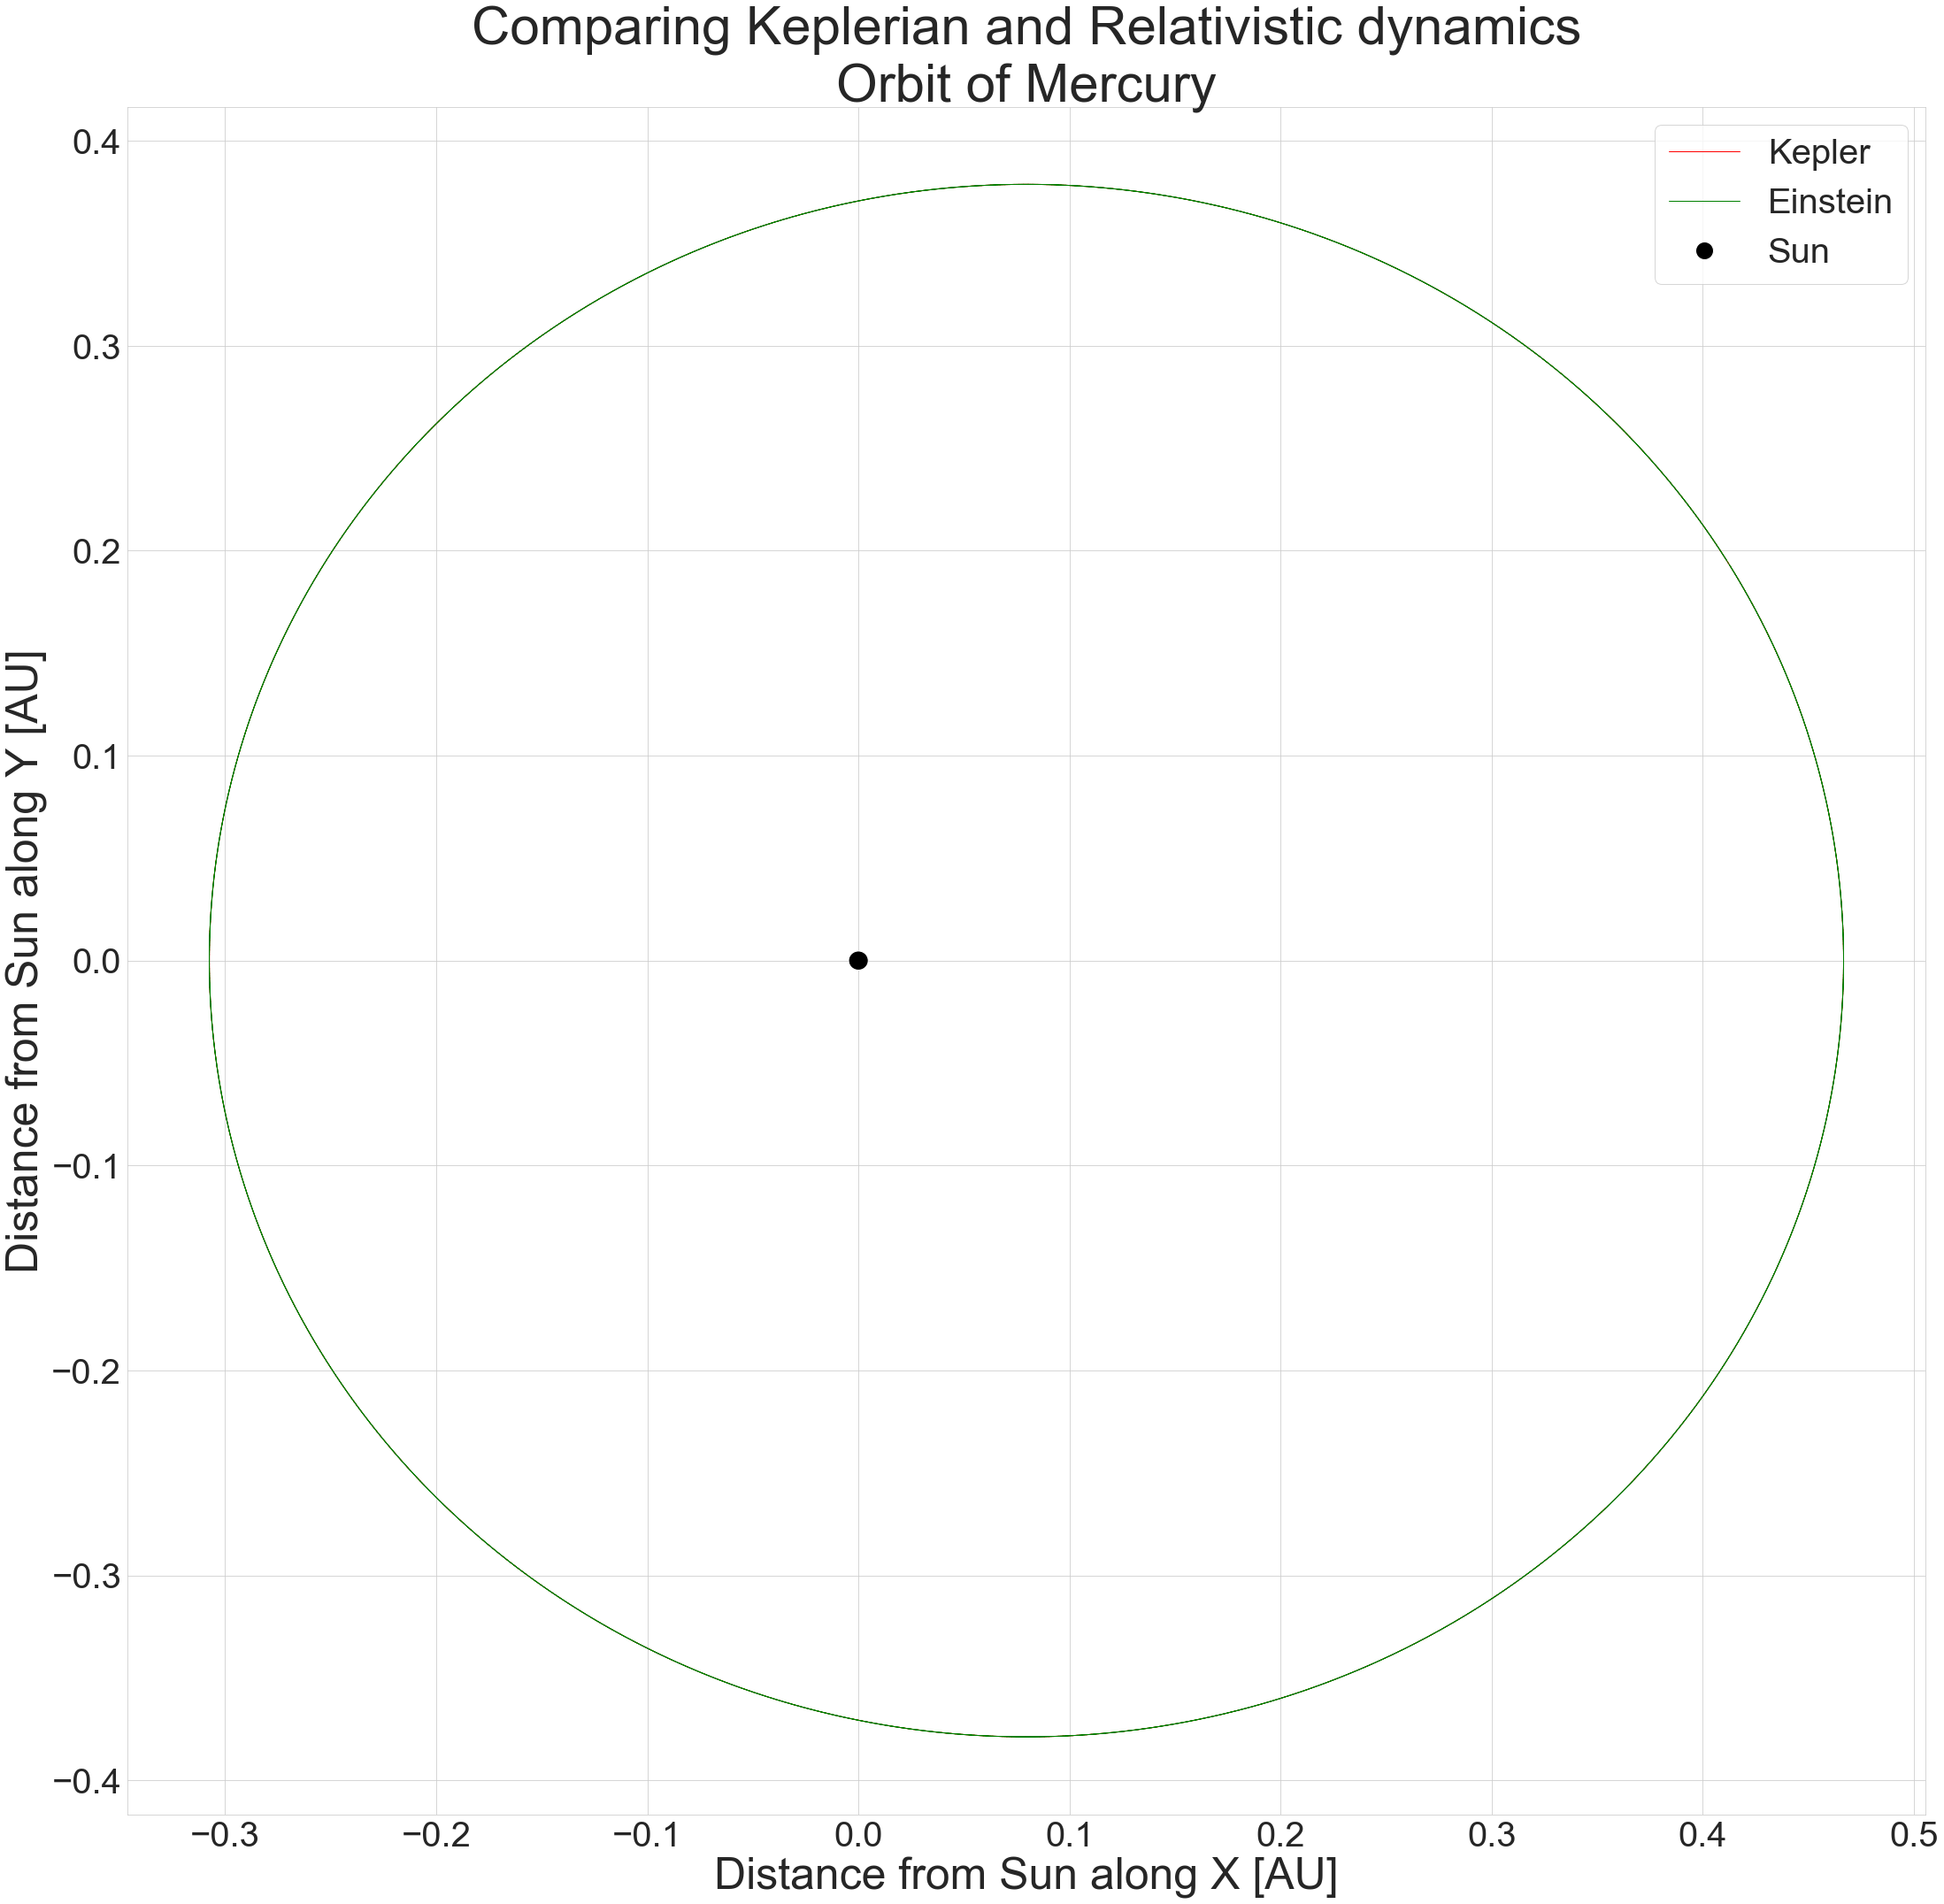

In [78]:
nrows = 1
ncols = 1
picsize = 30
titlesize=60
axislabelsize=50
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*(picsize)*(a/b),nrows*picsize))

plotting_years = 100

current_mode = mode_choose(mode = 'fixed', odeint='rkck', relat='no')
os.system(current_mode)
data_fixed = np.genfromtxt('fixed.dat')
axes.plot(data_fixed[::steps,1][:(2*int(len(data_fixed[::steps,1])/(plotting_years/T)))],
          data_fixed[::steps,2][:(2*int(len(data_fixed[::steps,2])/(plotting_years/T)))],
          c='red', linestyle='--', linewidth=1)

current_mode = mode_choose(mode = 'fixed', odeint='rkck', relat='relat')
os.system(current_mode)
data_fixed = np.genfromtxt('fixed.dat')
axes.plot(data_fixed[::steps,1][-(2*int(len(data_fixed[::steps,1])/(plotting_years/T))):],
          data_fixed[::steps,2][-(2*int(len(data_fixed[::steps,2])/(plotting_years/T))):],
          c='green', linewidth=1)

axes.set_title('Comparing Keplerian and Relativistic dynamics\nOrbit of {0}'.format(choosen_planet_2), fontsize=titlesize)

axes.set_xlabel('Distance from Sun along X [AU]', fontsize=axislabelsize)
axes.set_ylabel('Distance from Sun along Y [AU]', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=40)

Central_body = Circle(xy=(0, 0), radius=Planets[choosen_planet_1][3], fc='k', zorder=10)
axes.add_patch(Central_body)

legend_elements = [Line2D([0], [0], color='red', lw=1, label='Kepler'),
                   Line2D([0], [0], color='green', lw=1, label='Einstein'),
                   Line2D([0], [0], marker='o', color='white', markerfacecolor='black',
                          markersize=20, label=choosen_planet_1)]

axes.legend(handles=legend_elements, fontsize=40)
fig.tight_layout()
plt.savefig(image_path +
            'orbit_comparing_' + choosen_planet_2 + '.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Solar System

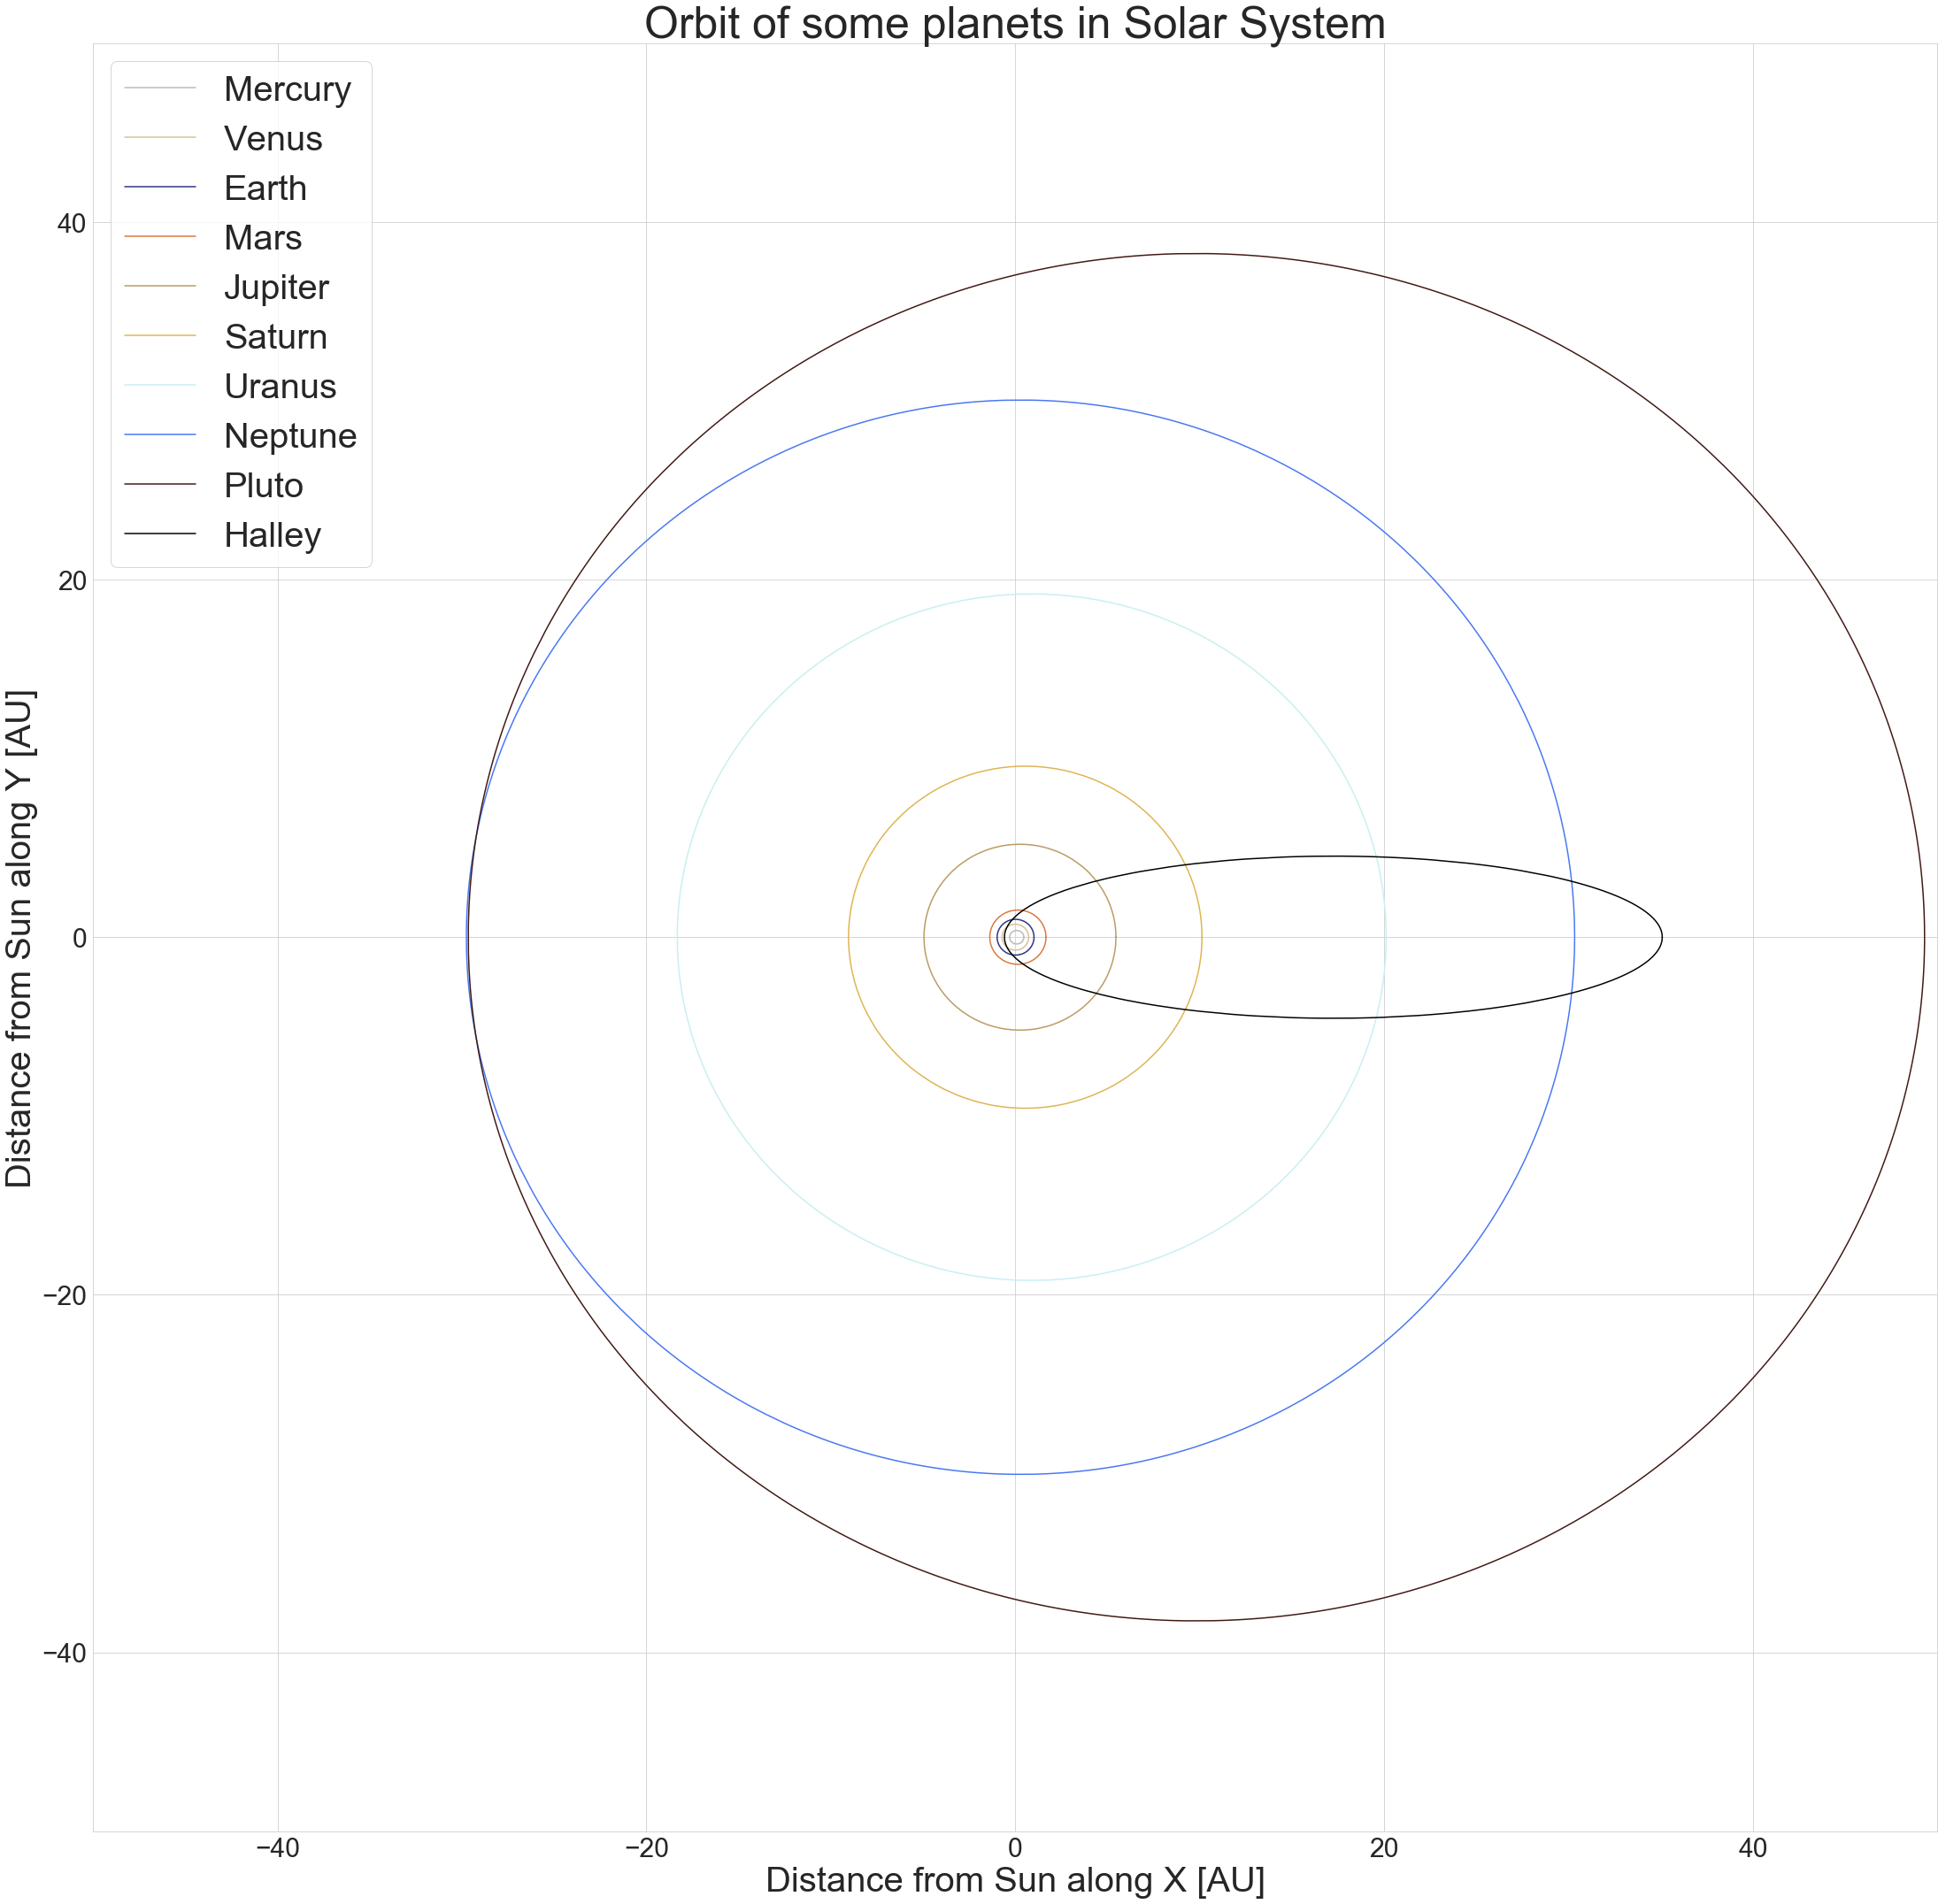

In [71]:
nrows = 1
ncols = 1
picsize = 30
titlesize=50
axislabelsize=40
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*picsize*(a/b),nrows*picsize))

for keys, values in Planets.items():
    if (keys!='' and keys!='Sun' and keys!='Moon'):
        color = np.array((np.random.rand(),np.random.rand(),np.random.rand()))
        
        # Masses of planets
        m_1 = Planets['Sun'][0]
        m_2 = Planets[keys][0]
        # Aphelion distance in AU
        r_ap = Planets[keys][1]
        # Eccentricity
        ecc = Planets[keys][2]
        # Orbital period in [years]
        T = np.power(r_ap / (1 + ecc), 1.5)
        plotting_years = T

        current_mode = mode_choose(mode='fixed', odeint='rkck', relat='relat')
        os.system(current_mode)
        data_fixed = np.genfromtxt('fixed.dat')
        axes.plot(data_fixed[::steps,1], data_fixed[::steps,2], c=Planet_Colors[keys], label=keys)

axes.set_title('Orbit of some planets in Solar System', fontsize=titlesize)
        
axes.set_xlim(-50,50)
axes.set_ylim(-50,50)
axes.set_xlabel('Distance from Sun along X [AU]', fontsize=axislabelsize)
axes.set_ylabel('Distance from Sun along Y [AU]', fontsize=axislabelsize)

axes.tick_params(axis='both', which='major', labelsize=30)

Sun = Circle(xy=(0, 0), radius=4.649e-03, fc='k', zorder=10)
axes.add_patch(Sun)

axes.legend(fontsize=30)

fig.tight_layout()
plt.savefig(image_path +
            'solar_system.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Animation

In [ ]:
def ANIMATE_VIDEO(path, video_title, mode):

    if(mode=='both'):
        video_title = 'double_pendulum_both.mp4'
        nrows=1
        ncols=1
        
    elif(mode=='compare'):
        video_title = 'double_pendulum_compare.mp4'
        nrows=1
        ncols=2
        
    else:
        nrows=1
        ncols=1
    
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*14,nrows*14))

    
    if(mode=='rkck'):
        x1 = coordinates_rkck[::steps,1]
        y1 = coordinates_rkck[::steps,2]
        x2 = coordinates_rkck[::steps,3]
        y2 = coordinates_rkck[::steps,4]

    elif(mode=='runge'):
        x1 = coordinates_runge[::steps,1]
        y1 = coordinates_runge[::steps,2]
        x2 = coordinates_runge[::steps,3]
        y2 = coordinates_runge[::steps,4]
        
    elif(mode=='both' or mode=='compare'):
        x1_rkck = coordinates_rkck[::steps,1]
        y1_rkck = coordinates_rkck[::steps,2]
        x2_rkck = coordinates_rkck[::steps,3]
        y2_rkck = coordinates_rkck[::steps,4]

        x1_runge = coordinates_runge[::steps,1]
        y1_runge = coordinates_runge[::steps,2]
        x2_runge = coordinates_runge[::steps,3]
        y2_runge = coordinates_runge[::steps,4]

    # Pendulum's circle size
    r_1 = 0.05 * np.power(m_1, 1/3)
    r_2 = 0.05 * np.power(m_2, 1/3)
    r = max(r_1, r_2)
    # Plot a trail of the m2 bob's position for the last trail_secs seconds.
    trail_secs = 1
    # This corresponds to max_trail time points.
    max_trail = int(trail_secs / dt)

    ##ANIMATION STUFF BEGINS HERE##

    def animation(i):
            
        if(mode=='both'):
            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax.set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax.plot([0, x1_rkck[i], x2_rkck[i]], [0, y1_rkck[i], y2_rkck[i]], lw=2, c='k')
            ax.plot([0, x1_runge[i], x2_runge[i]], [0, y1_runge[i], y2_runge[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1_rkck = Circle((x1_rkck[i], y1_rkck[i]), r_1, fc='red', ec='red', zorder=10)
            c2_rkck = Circle((x2_rkck[i], y2_rkck[i]), r_2, fc='green', ec='green', zorder=10)
            c1_runge = Circle((x1_runge[i], y1_runge[i]), r_1, fc='blue', ec='blue', zorder=10)
            c2_runge = Circle((x2_runge[i], y2_runge[i]), r_2, fc='orange', ec='orange', zorder=10)
            ax.add_patch(c0)
            ax.add_patch(c1_rkck)
            ax.add_patch(c2_rkck)
            ax.add_patch(c1_runge)
            ax.add_patch(c2_runge)

            ax.plot(x1_rkck[0:i], y1_rkck[0:i], c='red', solid_capstyle='butt', lw=2)
            ax.plot(x2_rkck[0:i], y2_rkck[0:i], c='green', solid_capstyle='butt', lw=2)
            ax.plot(x1_runge[0:i], y1_runge[0:i], c='blue', solid_capstyle='butt', lw=2)
            ax.plot(x2_runge[0:i], y2_runge[0:i], c='orange', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax.axis('off')
        
        elif(mode=='compare'):

            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax[0].set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax[0].set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax[0].set_aspect('equal', adjustable='box')
            
            ax[1].set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax[1].set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax[1].set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax[0].plot([0, x1_rkck[i], x2_rkck[i]], [0, y1_rkck[i], y2_rkck[i]], lw=2, c='k')
            ax[1].plot([0, x1_runge[i], x2_runge[i]], [0, y1_runge[i], y2_runge[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0_0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c0_1 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1_rkck = Circle((x1_rkck[i], y1_rkck[i]), r_1, fc='red', ec='red', zorder=10)
            c2_rkck = Circle((x2_rkck[i], y2_rkck[i]), r_2, fc='green', ec='green', zorder=10)
            c1_runge = Circle((x1_runge[i], y1_runge[i]), r_1, fc='blue', ec='blue', zorder=10)
            c2_runge = Circle((x2_runge[i], y2_runge[i]), r_2, fc='orange', ec='orange', zorder=10)
            ax[0].add_patch(c0_0)
            ax[1].add_patch(c0_1)
            ax[0].add_patch(c1_rkck)
            ax[0].add_patch(c2_rkck)
            ax[1].add_patch(c1_runge)
            ax[1].add_patch(c2_runge)

            ax[0].plot(x1_rkck[0:i], y1_rkck[0:i], c='red', solid_capstyle='butt', lw=2)
            ax[0].plot(x2_rkck[0:i], y2_rkck[0:i], c='green', solid_capstyle='butt', lw=2)
            ax[1].plot(x1_runge[0:i], y1_runge[0:i], c='blue', solid_capstyle='butt', lw=2)
            ax[1].plot(x2_runge[0:i], y2_runge[0:i], c='orange', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax[0].axis('off')
            ax[1].axis('off')
            
        else:
            # Centre the image on the fixed anchor point, and ensure the axes are equal
            ax.set_xlim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_ylim(-L_1-L_2-r, L_1+L_2+r)
            ax.set_aspect('equal', adjustable='box')
            
            # Plot and save an image of the double pendulum configuration for time
            # point i.
            # The pendulum rods.
            ax.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], lw=2, c='k')
            # Circles representing the anchor point of rod 1, and bobs 1 and 2.
            c0 = Circle((0, 0), 0.05/2, fc='k', zorder=10)
            c1 = Circle((x1[i], y1[i]), r_1, fc='orange', ec='orange', zorder=10)
            c2 = Circle((x2[i], y2[i]), r_2, fc='purple', ec='purple', zorder=10)
            ax.add_patch(c0)
            ax.add_patch(c1)
            ax.add_patch(c2)

            ax.plot(x1[0:i], y1[0:i], c='orange', solid_capstyle='butt', lw=2)
            ax.plot(x2[0:i], y2[0:i], c='purple', solid_capstyle='butt', lw=2)
            
            # Don't show axes, only white background
            ax.axis('off')
        
        
        plt.savefig(path + '_img{:04d}.png'.format(i), dpi=72)    # Save next frame as png
        image = imageio.imread(path + '_img{:04d}.png'.format(i)) # Load saved image
        writer.append_data(image)                                 # Append this image as the next frame to video

        # Clear the pyplot background for the next frame
        if(mode=='compare'):
            ax[0].cla()
            ax[1].cla()
        else:
            plt.cla()
            
        # Delete the now useless image from frames' folder
        os.unlink(path + '_img{:04d}.png'.format(i))

    with imageio.get_writer(video_title, fps=fps) as writer:
        if(mode=='both' or mode=='compare'):
            for i in range(0, len(x1_rkck)):
                sys.stdout.write('\r' + str(i+1) + ' / ' + str(len(x1_rkck)))
                sys.stdout.flush()
                animation(i)
        else:
            for i in range(0, len(x1)):
                sys.stdout.write('\r' + str(i+1) + ' / ' + str(len(x1)))
                sys.stdout.flush()
                animation(i)